# Personal Loan Campaign Modelling 


## Context
It is an important question for the Banks for who have to be lend a money and who are the 'risky' person regrading to pay the money back. We have to propose focusing on a particular fields of research for the future to successfully choose the liable customers.

## Objective

<br><li>To predict whether a liability customer will buy a personal loan or not.
<li>Which variables are most significant.
<li>Which segment of customers should be targeted more.

## Dataset

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Import packages

In [39]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

# Logistic Regression
<hr>

## Exploratory Data Analysis on the data

### import dataset

In [40]:
df=pd.read_csv('Loan_Modelling.csv') #Load data

### read and copy data

In [41]:
dat=df.copy() # copy to avoid change in the original dataset

### view 10 samples from the data

In [42]:
dat.sample(10) #check 10 samples from dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4086  4087   50          26      11    93106       4    0.2          1   
1099  1100   30           6      52    92717       3    0.7          2   
1289  1290   46          21      82    94523       4    0.4          1   
2702  2703   42          18     144    94063       2    6.1          1   
2308  2309   39          13      58    94590       2    2.4          2   
718    719   56          31      21    90024       2    0.2          3   
1994  1995   32           8     183    94080       1    6.0          1   
4306  4307   35          11      41    92123       3    2.0          1   
1204  1205   26           1     190    91604       4    1.3          2   
3986  3987   38          14     182    92152       3    2.6          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4086         0              0                   1           0       0   
1099         0              0                   0           0       1   
1289         0              0                   0           0       0   
2702       158              0                   0           0       0   
2308         0              0                   0           0       1   
718        137              0                   0           1       1   
1994         0              0                   0           0       0   
4306         0              0                   0           0       1   
1204       197              1                   0           0       1   
3986         0              1                   0           1       1   

      CreditCard  
4086           0  
1099           0  
1289           0  
2702           0  
2308           0  
718            1  
1994           0  
4306           0  
1204           0  
3986           1

### Shape of the data

In [43]:
print("There are {} rows and {} columns in the dataset" .format(dat.shape[0], dat.shape[1]))

There are 5000 rows and 14 columns in the dataset


### Basic information about the datatypes in the columns

In [44]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Are there any missing values?

In [45]:
dat.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<li>no missing values in the dataset</li>

In [46]:
dat.isnull().values.any()

False

### print the columns of the data

In [47]:
print(dat.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


### Summarizing data and check the range

In [48]:
dat.describe(include='all')

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [49]:
for c in dat.columns:
    print("Ragnge of", c, "between", dat[c].min(), "and", dat[c].max())

Ragnge of ID between 1 and 5000
Ragnge of Age between 23 and 67
Ragnge of Experience between -3 and 43
Ragnge of Income between 8 and 224
Ragnge of ZIPCode between 90005 and 96651
Ragnge of Family between 1 and 4
Ragnge of CCAvg between 0.0 and 10.0
Ragnge of Education between 1 and 3
Ragnge of Mortgage between 0 and 635
Ragnge of Personal_Loan between 0 and 1
Ragnge of Securities_Account between 0 and 1
Ragnge of CD_Account between 0 and 1
Ragnge of Online between 0 and 1
Ragnge of CreditCard between 0 and 1


<li>Average Age is 45.34
<li>Average Experience is 20 years and the standard deviation is the same as at the age
<li>income average is 73.77K and the standard deviation is relatively high
<li>ZIP Code should be regarded as categorical value
<li>Family mean is 2.39 and the max is 4 that means we have no big families in the dataset
<li>Regarding the mean of the average monthly spend on credit card 1.94K is the standard deviation very high 1.75K
<li>Average education average is near to the graduate
<li>Very high standard deviation in the mortgage data


<li>all variables are numerical</li>
<li>column ID ist the same as the index have to be removed</li>
<li>no missing values in the dataset</li>

# observation of data types
<hr>

<ul>
<li><strong>target variable:</strong></li>
    <ul><li>Personal_Loan</li></ul>
<li><strong>independent variables:</strong></li>
    <ul>
        <li>Age</li>
        <li>Experience (negativ values are not allowed)</li>
        <li>Income</li>
        <li>CCAvg</li>
        <li>Mortgage</li>
    </ul>
        
<li><strong>binary categorical variables:</strong></li>
    <ul>
        <li>Securities_Account</li>
        <li>CD_Account</li>
        <li>Online</li>
        <li>CreditCard</li>
        </ul>
<li><strong>ordinal variables:</strong></li>
    <ul>
        <li>ZIPCode</li>
        <li>Education</li>
         <li>Family</li>
    </ul>
    
<li><strong>The column ID has no additional infomation to the dataset</strong></li>
<li><strong>ZIPCode is complicated to assign states so have to be dropped</strong></li>
<li><strong>No missing values in the dataset</strong></li>
   
    
 </ul>   

### Drop columns

In [50]:
dat.drop("ID", axis=1, inplace=True)
dat.drop("ZIPCode", axis=1, inplace=True)

<li> ID has no additional meaning so I drop it, with ZIP Code we dont receive any additional information so I drop it also</li>

### Handling negativ value

In [51]:
a=dat['Experience'].unique()
a.sort()
print(a)

[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [52]:
dat['Experience']=abs(dat['Experience'])


  - There are negativ values, they are not acceptable I assume that the negativ sign only a mistake so I convert to absolut values


In [53]:
dat.nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [54]:
dat.sample(10)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
3257   59          35      84       1    1.8          3         0   
2820   29           4     102       2    3.3          1       303   
860    57          31      30       2    0.7          2       145   
4540   56          32      64       4    1.5          1         0   
4288   42          17      28       1    0.6          3         0   
388    54          30     100       4    3.4          3         0   
4709   26           1      35       2    1.7          2       119   
364    54          24      29       3    1.0          3       148   
1896   32           7      83       1    2.6          2         0   
3459   26           1      88       2    1.8          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
3257              0                   0           0       1           0  
2820              0                   0           0       0           0  
860               0                   0           0       0           0  
4540              0                   0           0       1           0  
4288              0                   0           0       0           1  
388               1                   0           0       0           0  
4709              0                   0           0       0           1  
364               0                   0           0       0           1  
1896              0                   1           0       0           1  
3459              0                   0           0       0           0

## Modify the position of the column 'Personal Loan'
<li>to set at the end of the list</li>

In [55]:
pl=dat['Personal_Loan']
dat.drop(['Personal_Loan'], inplace=True, axis=1)
dat['Personal_Loan']=pl

In [56]:
dat.head(10)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   
5   37          13      29       4    0.4          2       155   
6   53          27      72       2    1.5          2         0   
7   50          24      22       1    0.3          3         0   
8   35          10      81       3    0.6          2       104   
9   34           9     180       1    8.9          3         0   

   Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0  
5                   0           0       1           0              0  
6                   0           0       1           0              0  
7                   0           0       0           1              0  
8                   0           0       1           0              0  
9                   0           0       0           0              1

## Check the Shape

In [57]:
print("There are {} rows and {} columns" .format(dat.shape[0],dat.shape[1]))

There are 5000 rows and 12 columns


## Statistical summary

In [58]:
dat.describe().T

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Securities_Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD_Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   
Personal_Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Securities_Account    1.0  
CD_Account            1.0  
Online                1.0  
CreditCard            1.0  
Personal_Loan         1.0

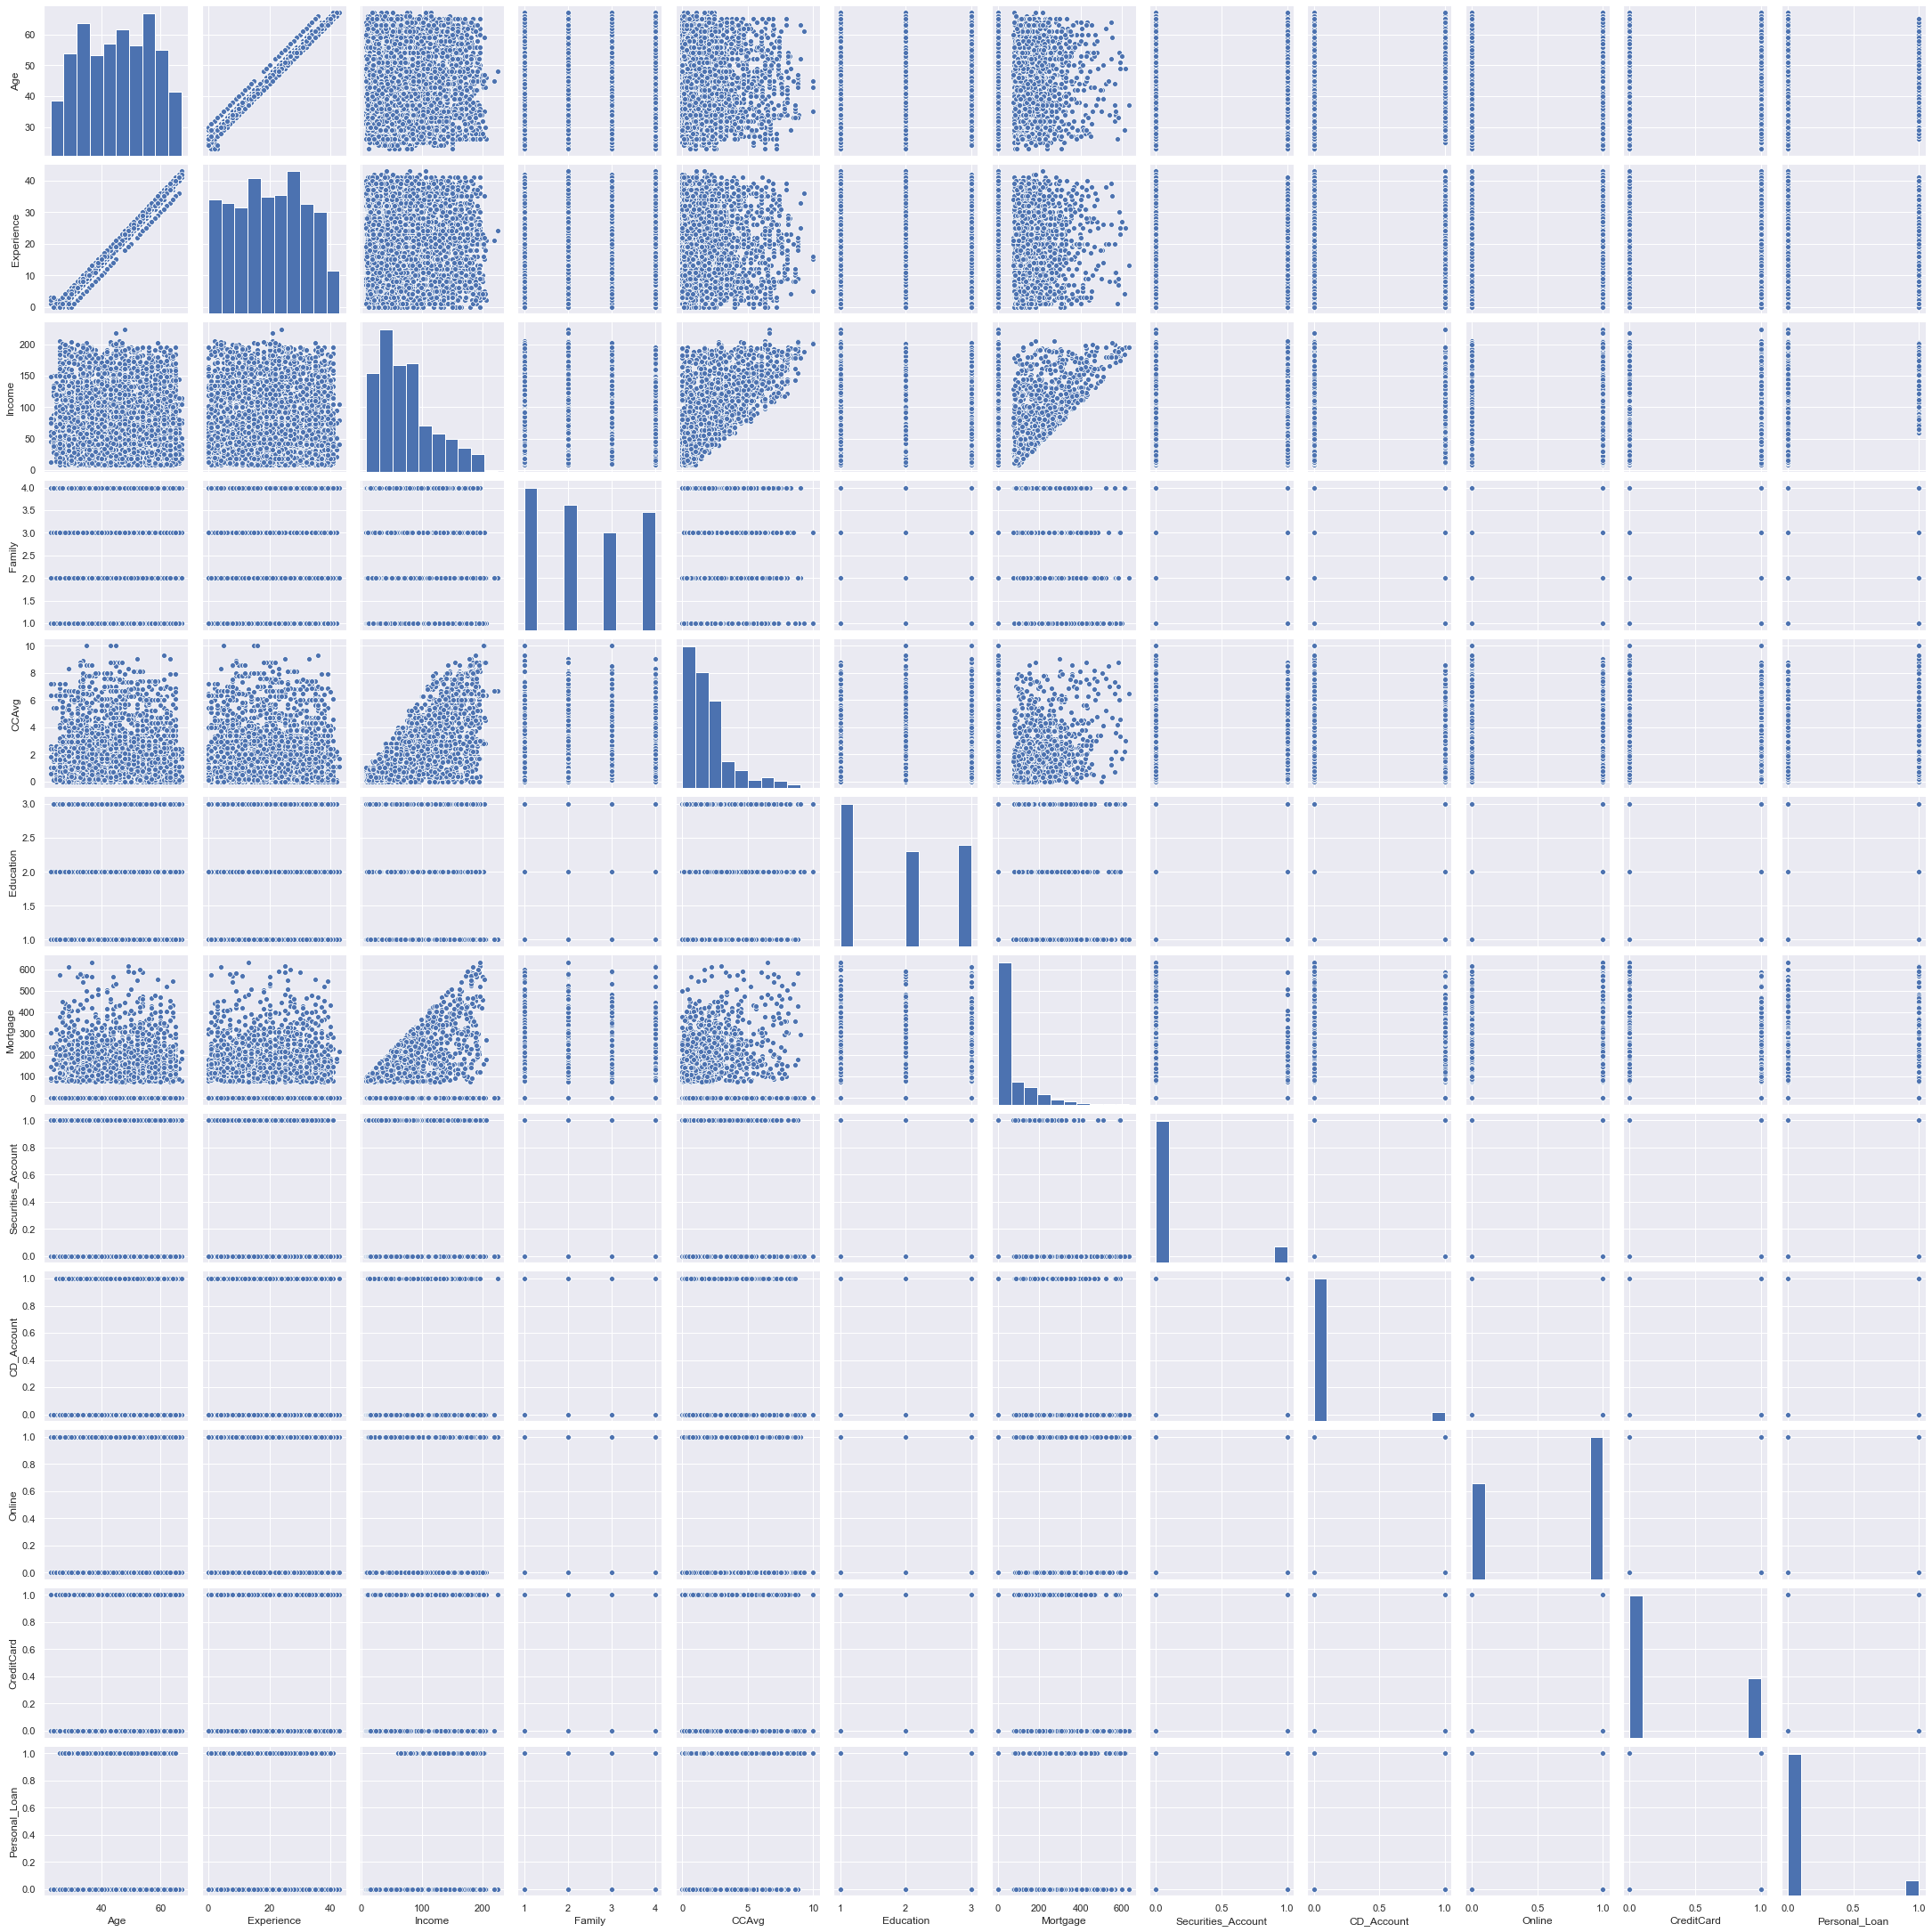

In [59]:
sns.pairplot(dat)

# Check the independent variables - Univariate analysis

### Information to the skewness:
<br>
<li>highly skewed: less then -1 or greater then 1 </li>
<li>moderately skewed: between -1 and -0.5 or between 0.5 and 1</li>
<li>approximately symmetric: between -0.5 and 0.5</li>

In [60]:
def histogram_boxplot(feature, figsize=(12,8), bins = None):
#     sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.3, .7)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='black', linestyle=':')
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-.')
    ax_hist2.axvline(feature.quantile(.25), color='yellow', linestyle='-.')
    ax_hist2.axvline(feature.quantile(.75), color='yellow', linestyle='-.')
    print( feature.name,": the mean: {}, the median: {}" .format(np.mean(feature), np.median(feature)))
    print("Skewness:", feature.skew())
    print("Q1: {}, Q3: {}" .format(feature.quantile(.25), feature.quantile(.75)))

Age : the mean: 45.3384, the median: 45.0
Skewness: -0.02934068151284029
Q1: 35.0, Q3: 55.0


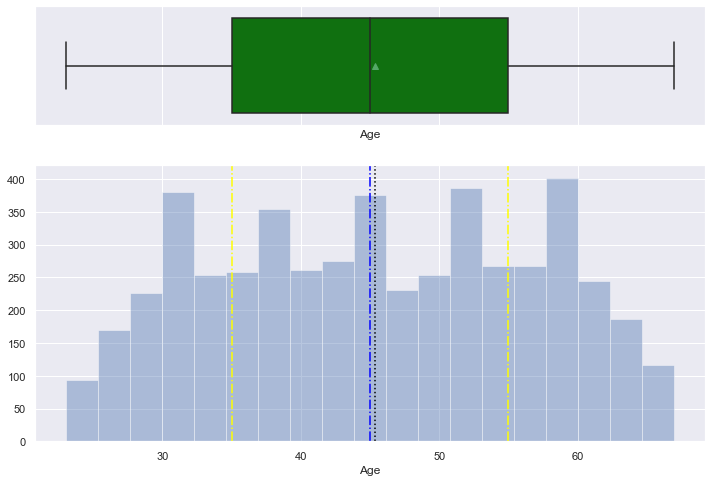

In [61]:
histogram_boxplot(dat['Age'])

  - Age is slightly skewed and no outliers
  - average is 45 years

Experience : the mean: 20.1346, the median: 20.0
Skewness: -0.010037994995886824
Q1: 10.0, Q3: 30.0


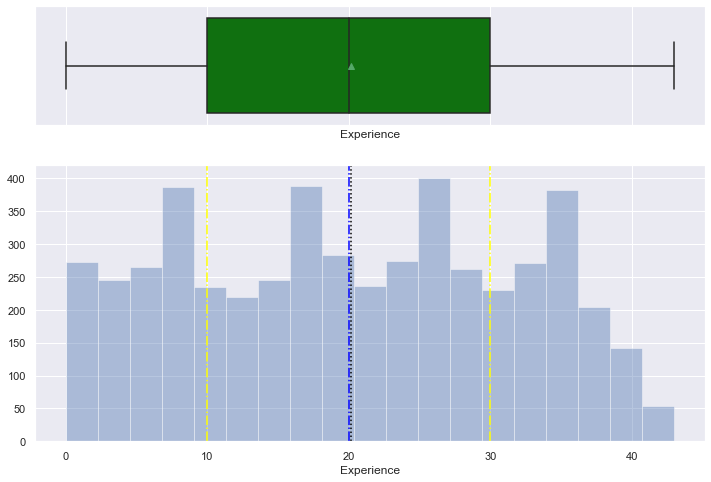

In [62]:
histogram_boxplot(dat['Experience'])

  - Experience is not skewed and no outliers negativ values are disappeared
  - average experience is 20 years

Income : the mean: 73.7742, the median: 64.0
Skewness: 0.8413386072610816
Q1: 39.0, Q3: 98.0


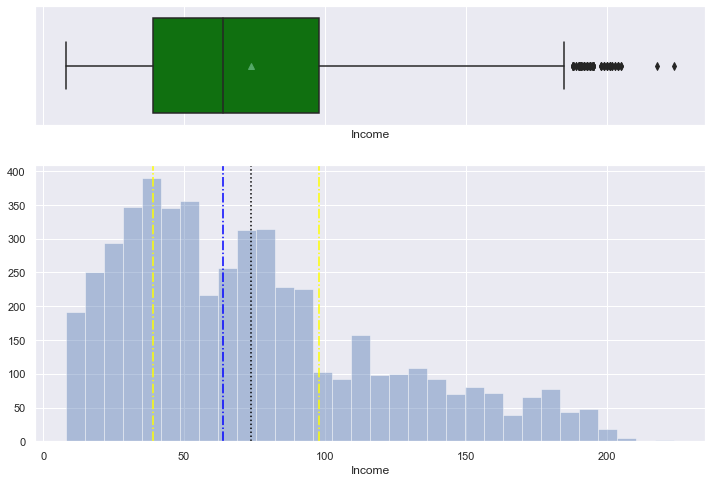

In [63]:
histogram_boxplot(dat['Income'])

  - Income is moderate skewed and outliers in the higher area
  - average income is 73.7K $

### handling skewness of CCAvg

In [64]:
dat['Income']=np.log1p(dat['Income'])

### After converting the skewed data

Income : the mean: 4.106952021481107, the median: 4.174387269895637
Skewness: -0.42071189305490625
Q1: 3.6888794541139363, Q3: 4.59511985013459


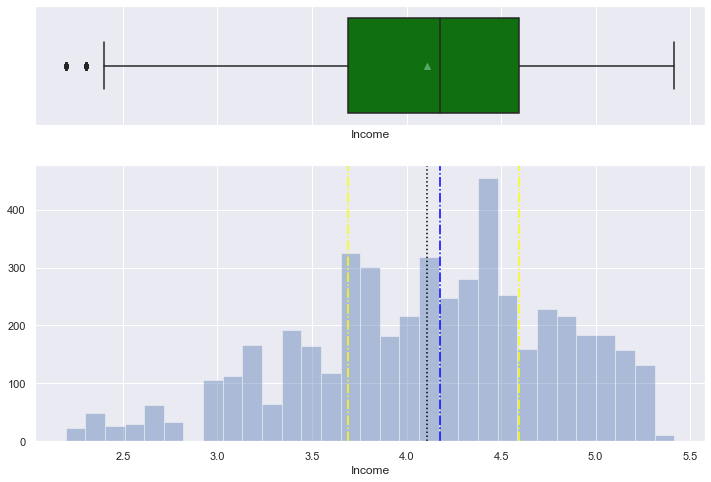

In [65]:
histogram_boxplot(dat['Income'])

<li>mean and median are closer to each other skewness is better after the log transformation</li>

CCAvg : the mean: 1.9379380000000053, the median: 1.5
Skewness: 1.5984433366678663
Q1: 0.7, Q3: 2.5


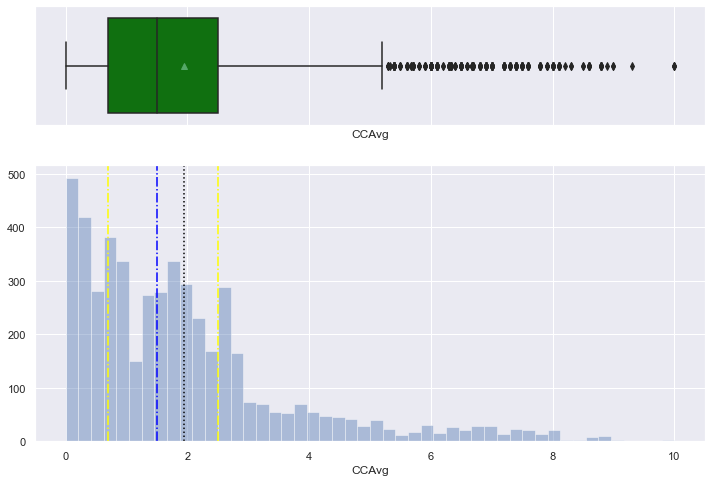

In [66]:
histogram_boxplot(dat['CCAvg'])

  - Credit card spending shows a highly right skewness and more outliers in the higher area
  - average expenditure is 1.9k $

### handling skewness of CCAvg

In [67]:
dat['CCAvg']=np.log1p(dat['CCAvg'])

### After converting the skewed data

CCAvg : the mean: 0.929356184391149, the median: 0.9162907318741551
Skewness: 0.31922379644464305
Q1: 0.5306282510621704, Q3: 1.252762968495368


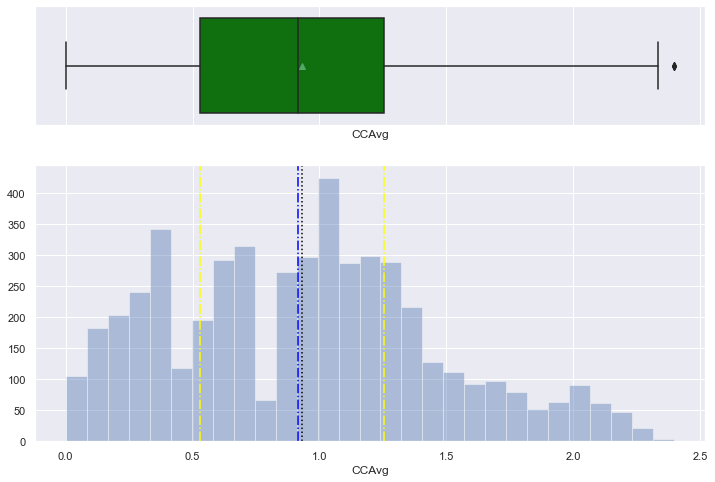

In [69]:
histogram_boxplot(dat['CCAvg'])

<li>mean and median much more closer to each other VVAvg shows a normal distribution</li>

Mortgage : the mean: 56.4988, the median: 0.0
Skewness: 2.1040023191079444
Q1: 0.0, Q3: 101.0


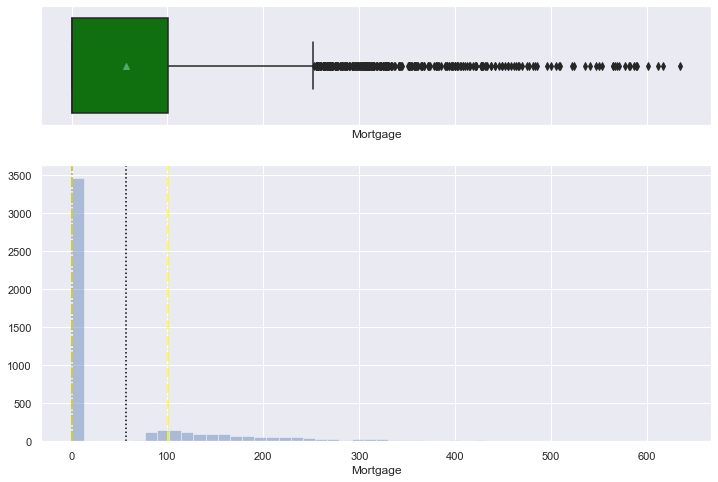

In [70]:
histogram_boxplot(dat['Mortgage'])

## Check the correlation of the variables

In [71]:
dat.corr()

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.993991 -0.057438 -0.046418 -0.050940   
Experience          0.993991    1.000000 -0.051183 -0.051851 -0.051318   
Income             -0.057438   -0.051183  1.000000 -0.123961  0.595186   
Family             -0.046418   -0.051851 -0.123961  1.000000 -0.083222   
CCAvg              -0.050940   -0.051318  0.595186 -0.083222  1.000000   
Education           0.041334    0.013919 -0.162616  0.064929 -0.105893   
Mortgage           -0.012539   -0.011097  0.184697 -0.020445  0.102168   
Securities_Account -0.000436   -0.000989  0.000113  0.019994  0.017071   
CD_Account          0.008043    0.009735  0.133851  0.014110  0.120666   
Online              0.013702    0.014051  0.015087  0.010354 -0.006400   
CreditCard          0.007681    0.008851 -0.004900  0.011588 -0.005195   
Personal_Loan      -0.007726   -0.008304  0.406975  0.061367  0.335715   

                    Education  Mortgage  Securities_Account  CD_Account  \
Age                  0.041334 -0.012539           -0.000436    0.008043   
Experience           0.013919 -0.011097           -0.000989    0.009735   
Income              -0.162616  0.184697            0.000113    0.133851   
Family               0.064929 -0.020445            0.019994    0.014110   
CCAvg               -0.105893  0.102168            0.017071    0.120666   
Education            1.000000 -0.033327           -0.010812    0.013934   
Mortgage            -0.033327  1.000000           -0.005411    0.089311   
Securities_Account  -0.010812 -0.005411            1.000000    0.317034   
CD_Account           0.013934  0.089311            0.317034    1.000000   
Online              -0.015004 -0.005995            0.012627    0.175880   
CreditCard          -0.011014 -0.007231           -0.015028    0.278644   
Personal_Loan        0.136722  0.142095            0.021954    0.316355   

                      Online  CreditCard  Personal_Loan  
Age                 0.013702    0.007681      -0.007726  
Experience          0.014051    0.008851      -0.008304  
Income              0.015087   -0.004900       0.406975  
Family              0.010354    0.011588       0.061367  
CCAvg              -0.006400   -0.005195       0.335715  
Education          -0.015004   -0.011014       0.136722  
Mortgage           -0.005995   -0.007231       0.142095  
Securities_Account  0.012627   -0.015028       0.021954  
CD_Account          0.175880    0.278644       0.316355  
Online              1.000000    0.004210       0.006278  
CreditCard          0.004210    1.000000       0.002802  
Personal_Loan       0.006278    0.002802       1.000000

<AxesSubplot:>

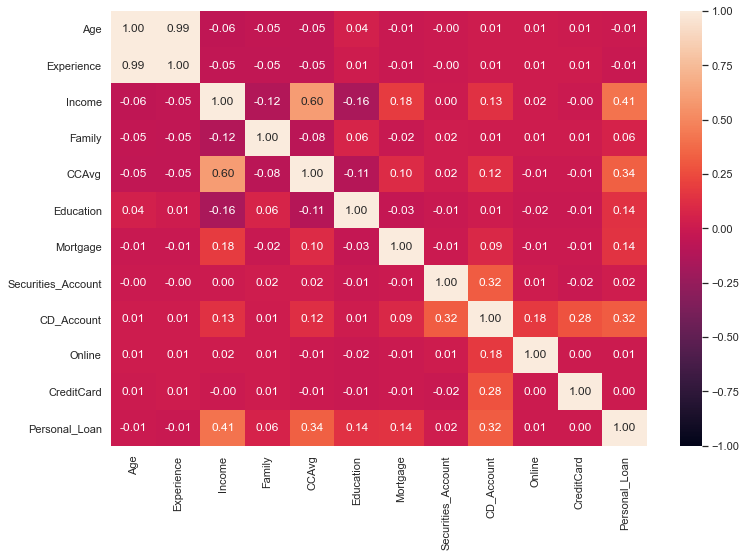

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(data=dat.corr(), vmax=1, vmin=-1, annot=True, fmt=".2f")

<li>there are no significant correlation between the variables exept the Expreience-Age combination</li>

### Check the variables

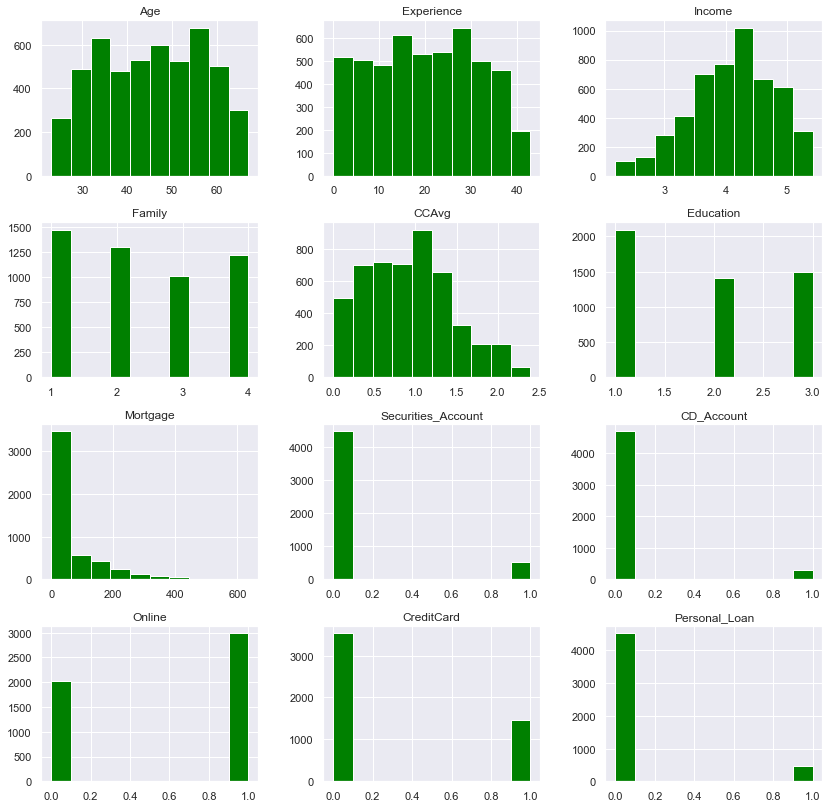

In [74]:
dat.hist(figsize=(14,14),color="green")
plt.show()

Text(0.5, 0, '0: No Loan, 1: Loan')

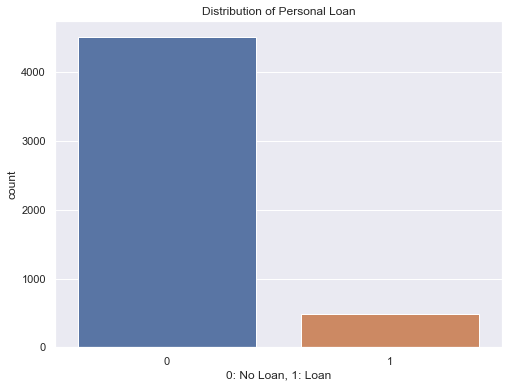

In [78]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

Text(0.5, 0, '0: No Loan, 1: Loan')

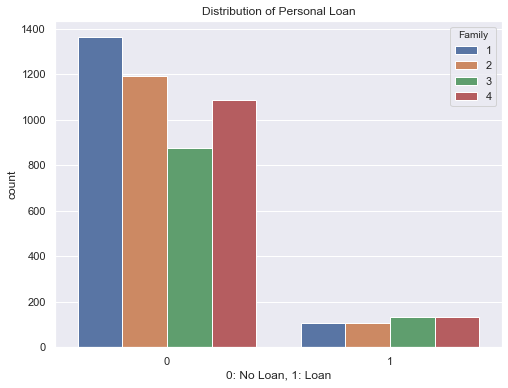

In [80]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan', hue='Family')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

<li>Personal loan according family size </li>

Text(0.5, 0, '0: No Loan, 1: Loan')

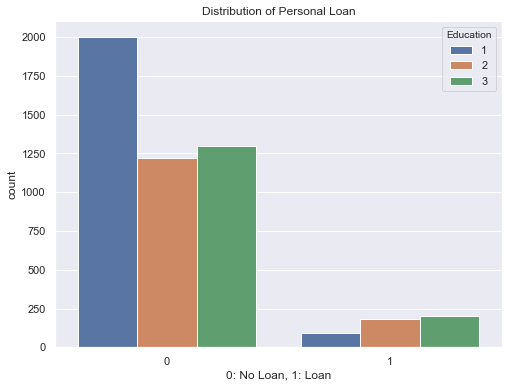

In [83]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan', hue='Education')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

<li>more opportunity to get a loan for people who are higher educated</li>

Text(0.5, 0, '0: No Loan, 1: Loan')

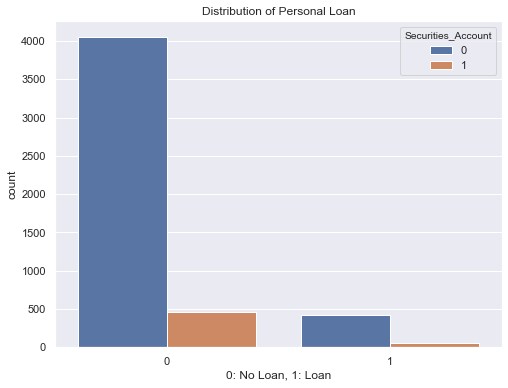

In [87]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan', hue='Securities_Account')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

<li>to have a securities account can be disadvantage at getting a loan from the bank</li>

Text(0.5, 0, '0: No Loan, 1: Loan')

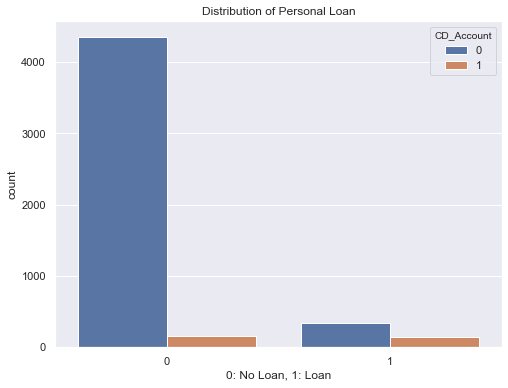

In [88]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan', hue='CD_Account')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

<li>better condition for getting a loan for people who have no certified deposit account?</li>

Text(0.5, 0, '0: No Loan, 1: Loan')

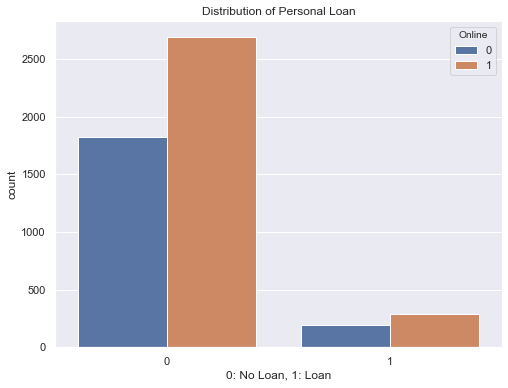

In [89]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan', hue='Online')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

<li>who are using internet services get more often a loadn from the bank</li>

Text(0.5, 0, '0: No Loan, 1: Loan')

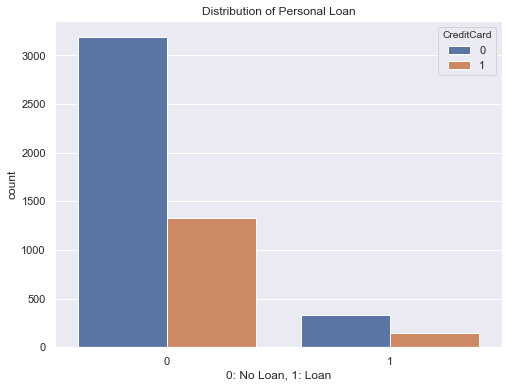

In [90]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=dat, x='Personal_Loan', hue='CreditCard')
plt.title('Distribution of Personal Loan')
plt.xlabel('0: No Loan, 1: Loan')

<li>no credit crard menas more possiblity to get a loan from the bank</li>

In [76]:
a=dat[dat['Personal_Loan']==0].count()['Personal_Loan']/dat['Personal_Loan'].count()*100
b=dat[dat['Personal_Loan']==1].count()['Personal_Loan']/dat['Personal_Loan'].count()*100
c=np.array([a,b])
print(a,"person didnt receive loan and", b, "got the loan")


90.4 person didnt receive loan and 9.6 got the loan


([<matplotlib.patches.Wedge at 0x176bb60b108>,
 [Text(-0.32674559497684597, -1.0503510442529331, 'not received loan'),
  Text(0.3267454474653994, 1.0503510901411186, 'received loan')],
 [Text(-0.17822486998737053, -0.5729187514106907, '90.4%'),
  Text(0.1782247895265815, 0.5729187764406101, '9.6%')])

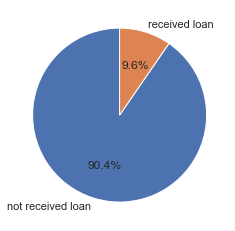

In [77]:
plt.pie(c,labels=['not received loan','received loan'], autopct='%1.1f%%',startangle = 90)

In [1761]:
dat

Age  Experience  Income  Family     CCAvg  Education  Mortgage  \
0      25           1      49       4  0.670652          1         0   
1      45          19      34       3  0.650391          1         0   
2      39          15      11       1  0.526589          1         0   
3      35           9     100       1  0.836526          2         0   
4      35           8      45       4  0.526589          2         0   
...   ...         ...     ...     ...       ...        ...       ...   
4995   29           3      40       1  0.724990          3         0   
4996   30           4      15       4  0.290033          1        85   
4997   63          39      24       2  0.232986          3         0   
4998   65          40      49       3  0.340368          2         0   
4999   28           4      83       3  0.462341          1         0   

      Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                      1           0       0           0              0  
1                      1           0       0           0              0  
2                      0           0       0           0              0  
3                      0           0       0           0              0  
4                      0           0       0           1              0  
...                  ...         ...     ...         ...            ...  
4995                   0           0       1           0              0  
4996                   0           0       1           0              0  
4997                   0           0       0           0              0  
4998                   0           0       1           0              0  
4999                   0           0       1           1              0  

[5000 rows x 12 columns]

In [1762]:
dat.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200     2.396400     0.617729   
std      11.463166    11.415189    46.033729     1.147663     0.284806   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.425678   
50%      45.000000    20.000000    64.000000     2.000000     0.650391   
75%      55.000000    30.000000    98.000000     3.000000     0.812157   
max      67.000000    43.000000   224.000000     4.000000     1.223156   

         Education     Mortgage  Securities_Account  CD_Account       Online  \
count  5000.000000  5000.000000         5000.000000  5000.00000  5000.000000   
mean      1.881000    56.498800            0.104400     0.06040     0.596800   
std       0.839869   101.713802            0.305809     0.23825     0.490589   
min       1.000000     0.000000            0.000000     0.00000     0.000000   
25%       1.000000     0.000000            0.000000     0.00000     0.000000   
50%       2.000000     0.000000            0.000000     0.00000     1.000000   
75%       3.000000   101.000000            0.000000     0.00000     1.000000   
max       3.000000   635.000000            1.000000     1.00000     1.000000   

        CreditCard  Personal_Loan  
count  5000.000000    5000.000000  
mean      0.294000       0.096000  
std       0.455637       0.294621  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.000000  
75%       1.000000       0.000000  
max       1.000000       1.000000

In [91]:
dat.skew()

Age                  -0.029341
Experience           -0.010038
Income               -0.420712
Family                0.155221
CCAvg                 0.319224
Education             0.227093
Mortgage              2.104002
Securities_Account    2.588268
CD_Account            3.691714
Online               -0.394785
CreditCard            0.904589
Personal_Loan         2.743607
dtype: float64

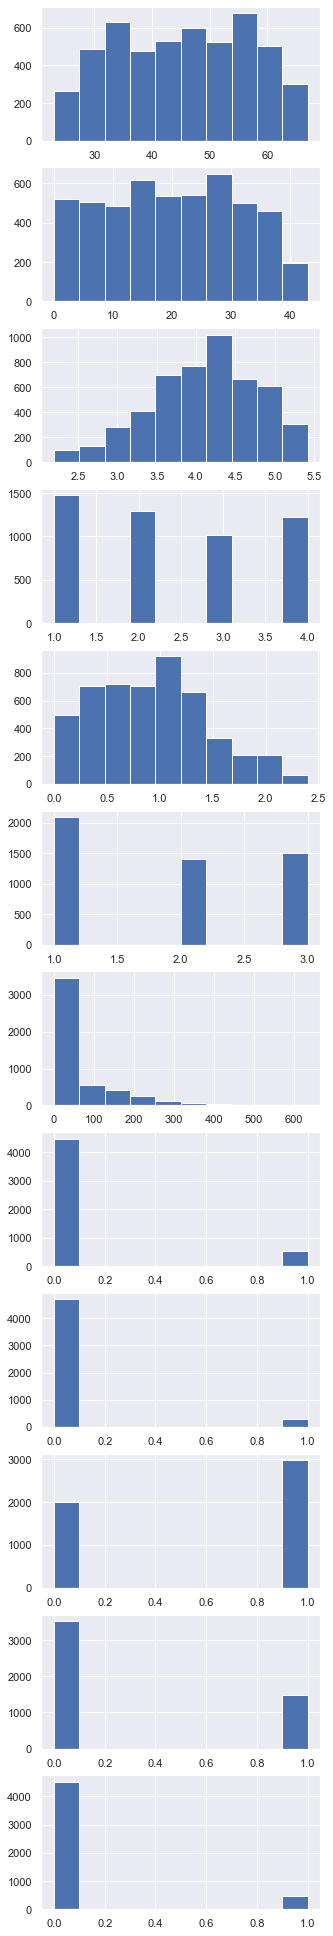

In [92]:
fig, axs=plt.subplots(len(dat.columns),figsize=(5,35))
for n, col in enumerate(dat.columns):
    dat[col].hist(ax=axs[n])


In [93]:
dat.head(10)

Age  Experience    Income  Family     CCAvg  Education  Mortgage  \
0   25           1  3.912023       4  0.955511          1         0   
1   45          19  3.555348       3  0.916291          1         0   
2   39          15  2.484907       1  0.693147          1         0   
3   35           9  4.615121       1  1.308333          2         0   
4   35           8  3.828641       4  0.693147          2         0   
5   37          13  3.401197       4  0.336472          2       155   
6   53          27  4.290459       2  0.916291          2         0   
7   50          24  3.135494       1  0.262364          3         0   
8   35          10  4.406719       3  0.470004          2       104   
9   34           9  5.198497       1  2.292535          3         0   

   Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0  
5                   0           0       1           0              0  
6                   0           0       1           0              0  
7                   0           0       0           1              0  
8                   0           0       1           0              0  
9                   0           0       0           0              1

# Data Pre-Processing

### Look at outliers in the columns

Age              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Experience    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Income        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CCAvg         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Mortgage        AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

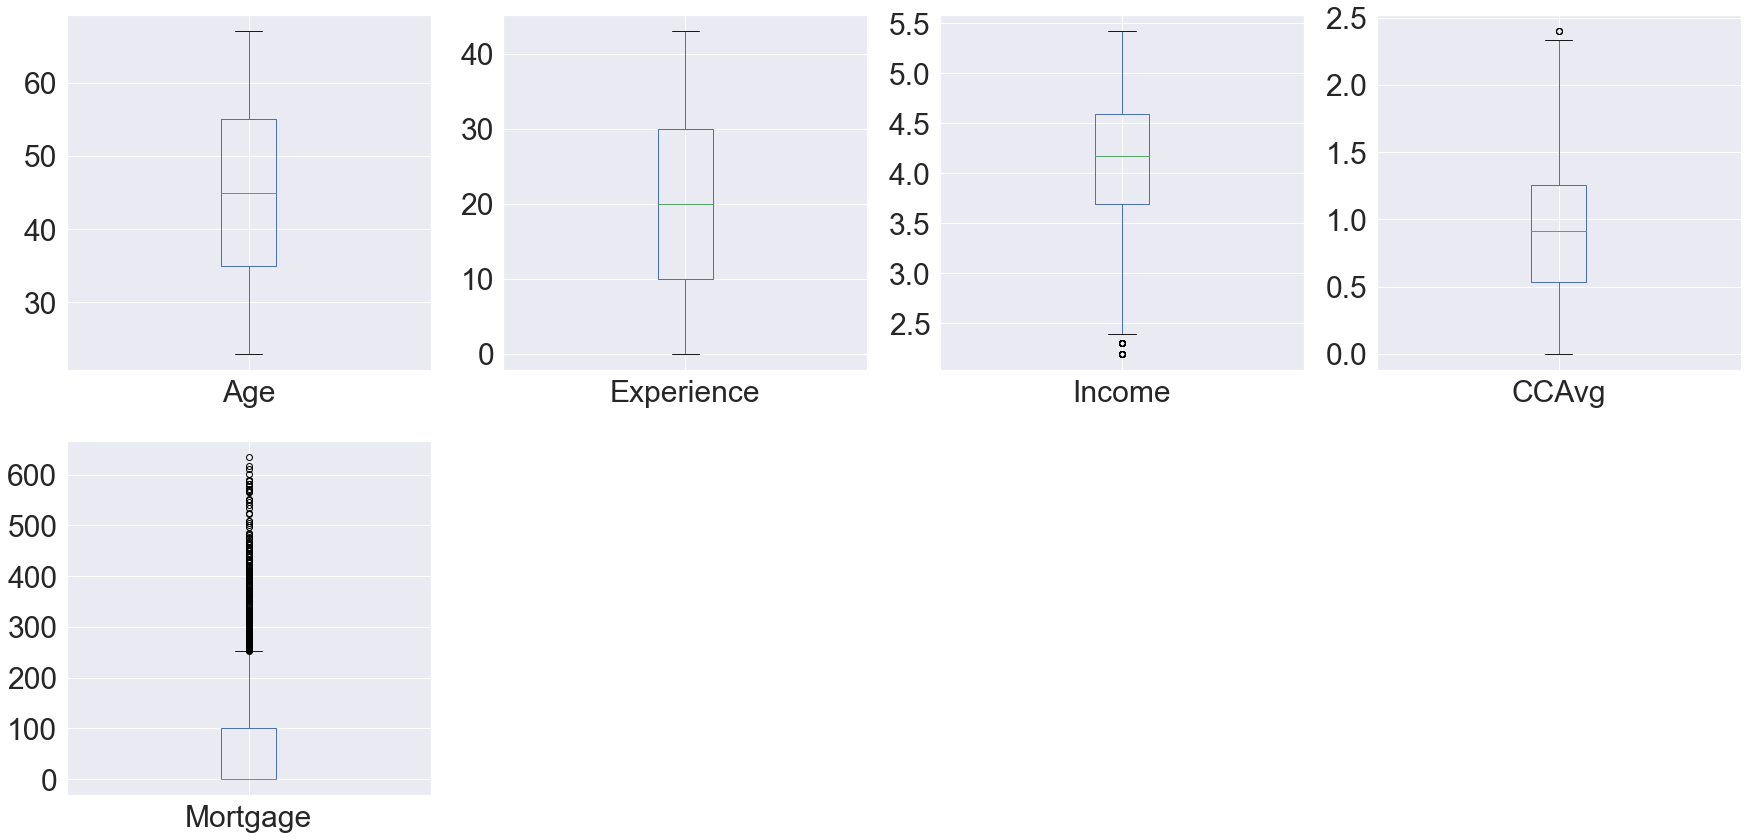

In [103]:
# outlier detection using boxplot
col = dat[['Age','Experience','Income','CCAvg','Mortgage']]
col.plot(kind='box', subplots=True, layout=(4,4), fontsize=30, figsize = (30, 30))

* There are outliers in the following columns:
    - Income
    - CCAvg
    - Mortgage

## Treating outliers with Inter Quartile Range method

In [104]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [108]:
col = dat[['Age','Experience','Income','CCAvg','Mortgage']]
treat_outliers_all(dat,col)

Age  Experience    Income  Family     CCAvg  Education  Mortgage  \
0      25           1  3.912023       4  0.955511          1       0.0   
1      45          19  3.555348       3  0.916291          1       0.0   
2      39          15  2.484907       1  0.693147          1       0.0   
3      35           9  4.615121       1  1.308333          2       0.0   
4      35           8  3.828641       4  0.693147          2       0.0   
...   ...         ...       ...     ...       ...        ...       ...   
4995   29           3  3.713572       1  1.064711          3       0.0   
4996   30           4  2.772589       4  0.336472          1      85.0   
4997   63          39  3.218876       2  0.262364          3       0.0   
4998   65          40  3.912023       3  0.405465          2       0.0   
4999   28           4  4.430817       3  0.587787          1       0.0   

      Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                      1           0       0           0              0  
1                      1           0       0           0              0  
2                      0           0       0           0              0  
3                      0           0       0           0              0  
4                      0           0       0           1              0  
...                  ...         ...     ...         ...            ...  
4995                   0           0       1           0              0  
4996                   0           0       1           0              0  
4997                   0           0       0           0              0  
4998                   0           0       1           0              0  
4999                   0           0       1           1              0  

[5000 rows x 12 columns]

Age              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Experience    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Income        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CCAvg         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Mortgage        AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

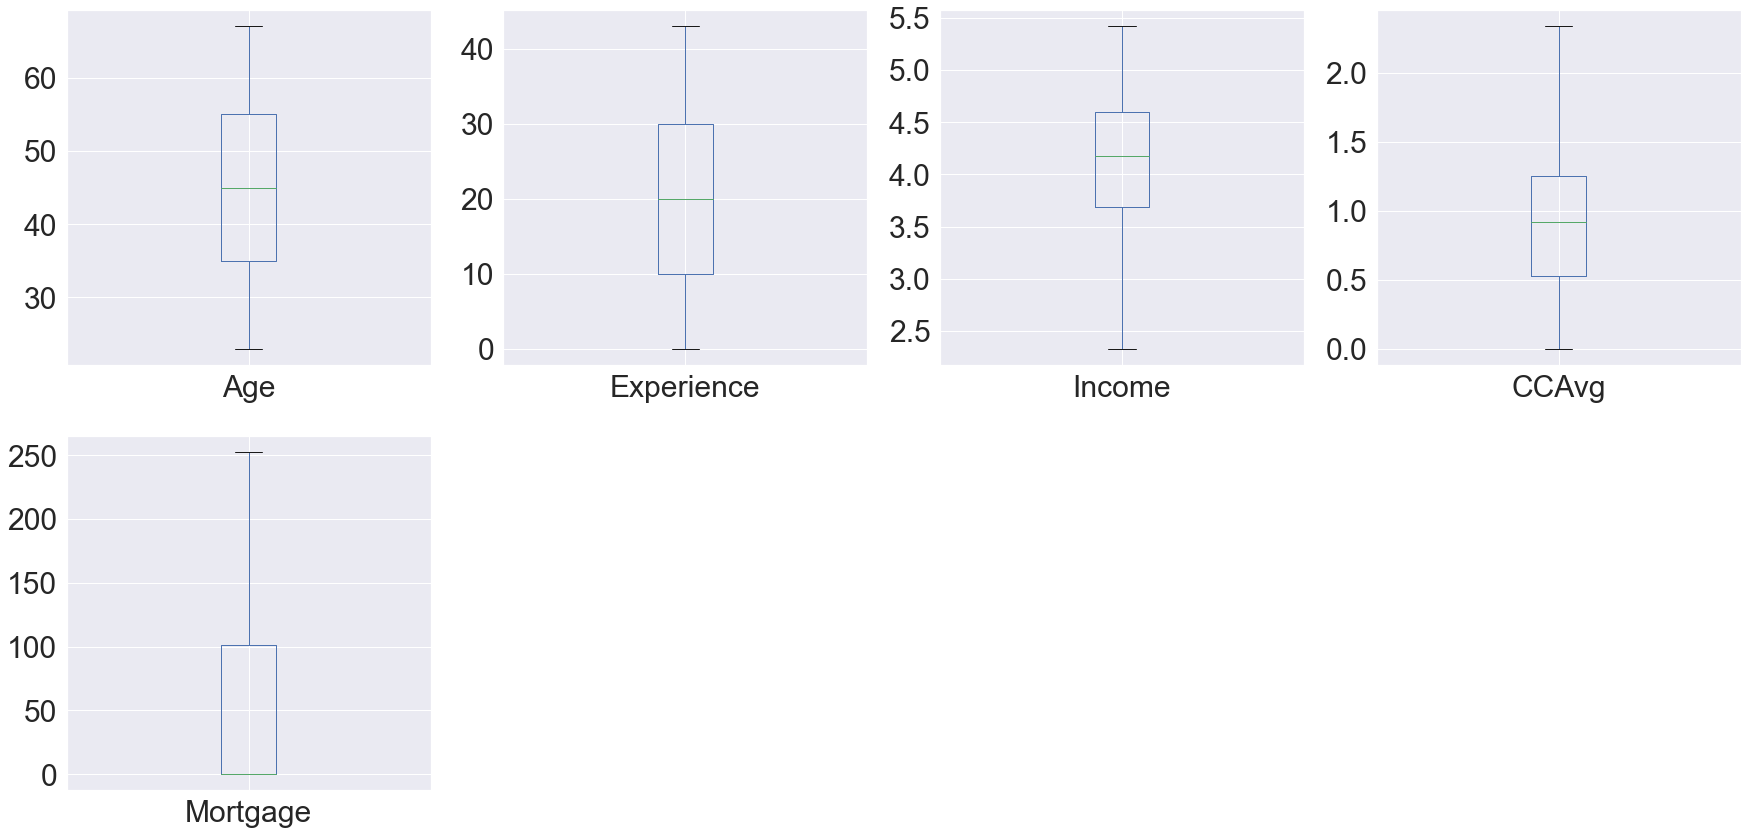

In [109]:
# outlier detection using boxplot
col = dat[['Age','Experience','Income','CCAvg','Mortgage']]
col.plot(kind='box', subplots=True, layout=(4,4), fontsize=30, figsize = (30, 30))

<li>outliers succefully removed</li> 

# Model Building - Logistic regression

## Data check

In [110]:
dat.head()

Age  Experience    Income  Family     CCAvg  Education  Mortgage  \
0   25           1  3.912023       4  0.955511          1       0.0   
1   45          19  3.555348       3  0.916291          1       0.0   
2   39          15  2.484907       1  0.693147          1       0.0   
3   35           9  4.615121       1  1.308333          2       0.0   
4   35           8  3.828641       4  0.693147          2       0.0   

   Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0

In [111]:
X=dat.drop('Personal_Loan',axis=1)
y=dat['Personal_Loan']

## dropping column with perfect collinearity
* <Strong> VIF (Variance Inflation Factor) can measure the inflation in the variables in the dataset and filter the collinearities in the predictors</strong><br>
    - <1 no correlation among the predictors
    - 1< and <5 the is light correlation
    - 5< and <10 moderate correlation
    - 10< high correlation

In [112]:
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [113]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 484.576579
Age                    89.468254
Experience             89.381806
Income                  1.626274
Family                  1.023742
CCAvg                   1.562452
Education               1.098930
Mortgage                1.022890
Securities_Account      1.134386
CD_Account              1.309176
Online                  1.039399
CreditCard              1.106109
dtype: float64



<li>multicollinearity at Age-Experience -> Experience have to be dropped</li>

In [114]:
X=X.drop('Experience',axis=1)

In [115]:
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [116]:
X.head()

Age    Income  Family     CCAvg  Education  Mortgage  Securities_Account  \
0   25  3.912023       4  0.955511          1       0.0                   1   
1   45  3.555348       3  0.916291          1       0.0                   1   
2   39  2.484907       1  0.693147          1       0.0                   0   
3   35  4.615121       1  1.308333          2       0.0                   0   
4   35  3.828641       4  0.693147          2       0.0                   0   

   CD_Account  Online  CreditCard  
0           0       0           0  
1           0       0           0  
2           0       0           0  
3           0       0           0  
4           0       0           1

In [117]:
y.sample(5)

4854    0
1298    0
2553    0
2058    0
2287    0
Name: Personal_Loan, dtype: int64

# Logistic regression
<br><li>before a modell building we can check the multicollinearity with Variance Influence Factor method</li>

## Check the multicollinearity before create the model

In [118]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 82.963719
Age                    1.008451
Income                 1.624083
Family                 1.022381
CCAvg                  1.557984
Education              1.033970
Mortgage               1.022888
Securities_Account     1.134166
CD_Account             1.308409
Online                 1.039371
CreditCard             1.106108
dtype: float64



<li>There is no (moderate and high) multicollinearity in the dataset</li>

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [120]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [121]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [122]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Act. - 0","Act. - 1"]],
                  columns = [i for i in ['Predicted - 0','Predicted - 1']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [123]:
log_mod=LogisticRegression()
mod=log_mod.fit(X_train,y_train)
log_pred = log_mod.predict(X_test)
log_mod_score = log_mod.score(X_test, y_test)
log_mod_accuracy = accuracy_score(y_test, log_pred)
log_conf_mat = metrics.confusion_matrix(y_test, log_pred)

In [124]:
get_metrics_score(mod,X_train, X_test, y_train, y_test, flag=True)

Accuracy on training set :  0.9337142857142857
Accuracy on test set :  0.922
Recall on training set :  0.44108761329305135
Recall on test set :  0.3691275167785235
Precision on training set :  0.7564766839378239
Precision on test set :  0.7051282051282052
F1 on training set :  0.5572519083969465
F1 on test set :  0.4845814977973569


[0.9337142857142857,
 0.922,
 0.44108761329305135,
 0.3691275167785235,
 0.7564766839378239,
 0.7051282051282052,
 0.5572519083969465,
 0.4845814977973569]

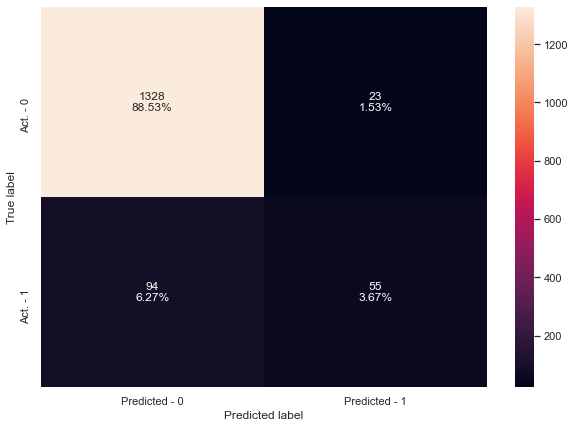

In [125]:
make_confusion_matrix(mod, X_test,y_test)

In [126]:
y_predict = mod.predict(X_test)
c_mat=confusion_matrix(y_test, y_predict, labels=[0,1])

In [127]:
c_mat

array([[1328,   23],
       [  94,   55]], dtype=int64)

# ROC-AUC on training set

In [128]:
print("Roc-Auc score on Training Set {:.4f}".format(roc_auc_score(y_train, mod.predict(X_train))))

Roc-Auc score on Training Set 0.7131


In [129]:
print("Roc-Auc score on Training Set proba {:.4f}".format(roc_auc_score(y_train, mod.predict_proba(X_train)[:,1])))

Roc-Auc score on Training Set proba 0.9322


In [130]:
pd.DataFrame(mod.predict_proba(X_train)[:,1])

0
0     0.002374
1     0.009828
2     0.003077
3     0.277904
4     0.001452
...        ...
3495  0.005304
3496  0.000260
3497  0.000110
3498  0.040571
3499  0.083194

[3500 rows x 1 columns]

In [131]:
pd.DataFrame(mod.predict(X_train))

0
0     0
1     0
2     0
3     0
4     0
...  ..
3495  0
3496  0
3497  0
3498  0
3499  0

[3500 rows x 1 columns]

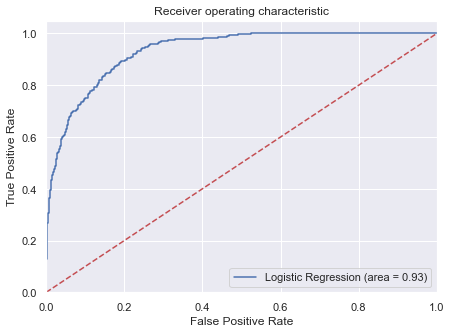

In [132]:
logit_roc_auc_train = roc_auc_score(y_train, mod.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, mod.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC-AUC on test set

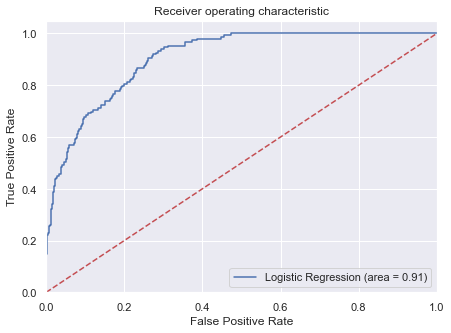

In [138]:
logit_roc_auc_test = roc_auc_score(y_test, mod.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, mod.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## The coefficients of the model

In [139]:
log_odds = mod.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coefficients']).T

Age    Income    Family     CCAvg  Education  Mortgage  \
coefficients -0.039428  1.959288  0.138792  1.077361   0.719261  0.000828   

              Securities_Account  CD_Account    Online  CreditCard  
coefficients           -3.161697    5.764046 -1.777612   -2.466569

<strong>Interpretation of coefficients:</strong>
- Coefficients like Experience,	Income,	Family,	CCAvg, Education, CD_Account are postitiv increases the chance to get loan
- Coefficients like Age Securities Account, Online, Credit Card are negativ impact for receiving loan from the bank

## coefficients to odds


In [140]:
change_odds = (np.exp(np.abs(mod.coef_[0]))-1)*100
pd.DataFrame(change_odds, X_train.columns, columns=['odds']).T

Age     Income     Family       CCAvg   Education  Mortgage  \
odds  4.021517  609.42731  14.888459  193.692001  105.291489  0.082869   

      Securities_Account    CD_Account      Online   CreditCard  
odds         2261.062043  31763.497649  491.571183  1078.195238

## AUC-ROC curve for optimalizing threshold

In [141]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, mod.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.03658051538484242


In [142]:
# Model prediction with optimal threshold

pred_train_opt = (mod.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (mod.predict_proba(X_test)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.7065714285714285
Accuracy on test data: 0.7286666666666667
Recall on train data: 0.972809667673716
Recall on test data: 0.9328859060402684
Precision on train data: 0.24029850746268658
Precision on test data: 0.2593283582089552
F1 Score on train data: 0.3853979652902454
F1 Score on test data: 0.40583941605839413
ROC-AUC Score on train data: 0.8257863421991174
ROC-AUC Score on test data: 0.8195147516877878


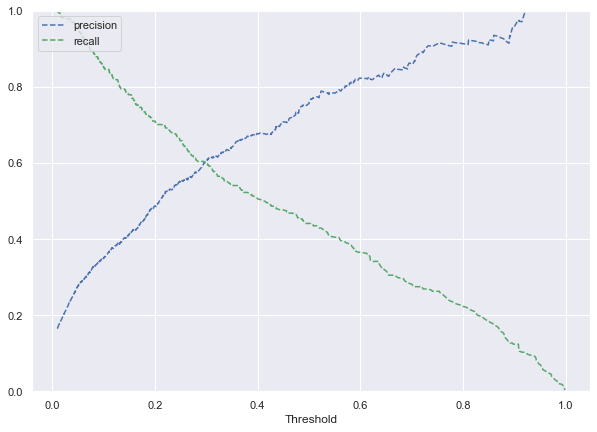

In [136]:
y_scores=mod.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

<li>ca 0.31 we get a higher Recall and a good precision</li>

In [143]:
optimal_threshold = 0.30

# Model prediction with optimal threshold
pred_train_opt = (mod.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (mod.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9251428571428572
Accuracy on test data: 0.906
Recall on train data: 0.6012084592145015
Recall on test data: 0.5100671140939598
Precision on train data: 0.6048632218844985
Precision on test data: 0.5277777777777778
F1 Score on train data: 0.603030303030303
F1 Score on test data: 0.5187713310580205
ROC-AUC Score on train data: 0.7800930273352407
ROC-AUC Score on test data: 0.7298670137457216


<li>the model is performing well on the training and test set also</li>

# Sequential Feature Selector

<strong>Our goal is with the feature selector method:</strong>
- Speed Up the modell (using less variables)
- reduce dimensionality


In [144]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [145]:
## Defining X and Y variables
X = dat.drop(['Personal_Loan'], axis=1)
Y = dat['Personal_Loan']


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [146]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [147]:
X_train.shape

(3500, 11)

## In every step add a new variable to the model and give an improvement factor

In [148]:
# we will first build model with all varaible
sfs = SFS(m, k_features=11, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    3.9s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    3.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.3s finished

[2021-05-21 06:31:56] Features: 1/11 -- score: 0.39002603821880927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished

[2021-05-21 06:31:56] Features: 2/11 -- score: 0.6562029117059466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2021-05-21 06:31:57

- the perfomance starts to decreasing at the 8th feature and starts to increasing at the last one 11th
- f1 score is not so significant so it is suggested to build a simplier model
- the increase is not so high so I will use 8 feature to build a model

Text(0.5, 1.0, 'Sequential Forward Selection (Standard Deviation)')

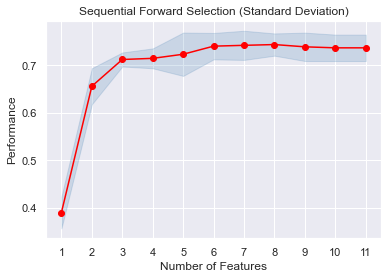

In [151]:
plot_sfs(sfs.get_metric_dict(),kind='std_dev', color='red')
plt.title('Sequential Forward Selection (Standard Deviation)')

<i>from the 5th feature the performance became worse </i>

In [152]:
sfs1 = SFS(m, k_features=8, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.6s finished

[2021-05-21 06:33:05] Features: 1/8 -- score: 0.39002603821880927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished

[2021-05-21 06:33:06] Features: 2/8 -- score: 0.6562029117059466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2021-05-21 06:33:06] 

Text(0.5, 1.0, 'Sequential Forward Selection (Standard Deviation)')

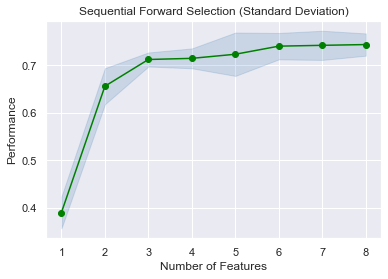

In [153]:
plot_sfs(sfs1.get_metric_dict(),kind='std_dev', color='green')
plt.title('Sequential Forward Selection (Standard Deviation)')


## Which are the important features?

In [154]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 3, 4, 5, 7, 8, 9, 10]


### Which columns are the most important regarding the influence?

In [155]:
X_train.columns[feat_cols]

Index(['Income', 'Family', 'CCAvg', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [156]:
X_train.shape

(3500, 11)

In [157]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [158]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [160]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

Accuracy on training set :  0.9597142857142857
Accuracy on test set :  0.95
Recall on training set :  0.6858006042296072
Recall on test set :  0.6308724832214765
Precision on training set :  0.8598484848484849
Precision on test set :  0.8245614035087719
F1 on training set :  0.7630252100840337
F1 on test set :  0.714828897338403


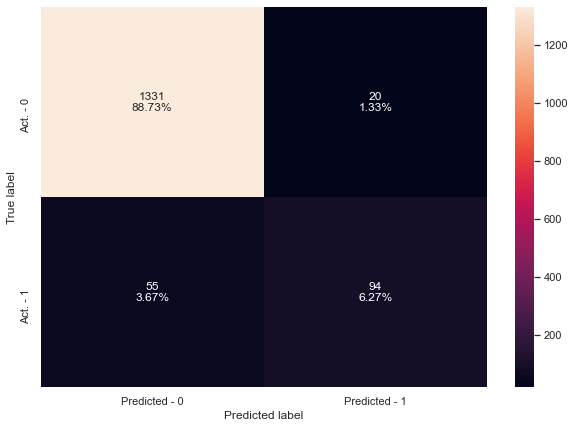

In [161]:
make_confusion_matrix(logreg,X_test_final,y_test)

# Result of logistic regression models:

In [165]:
comparison_frame = pd.DataFrame({'Model':['Original/Initial Logistic Regression Model', 
                                          'Logistic Regression with Optimal threshold of 0 .30',
                                          'Logistic Regression with sequential feature selector with 8 variables'], 
                                 'Train_Accuracy':[0.933,0.925,0.959], 
                                 'Test_Accuracy':[0.922,0.906, 0.95],
                                 'Train Recall':[0.441,0.601,0.658],
                                 'Test Recall':[0.369,0.510,0.630], 
                                 'Train Precision':[0.756,0.604,0.859],
                                 'Test Precision':[0.705,0.527,0.824],
                                 'Train F1':[0.557,0.603,0.763],
                                 'Test F1':[0.484,0.518,0.824]
                                 
                                }) 

comparison_frame

Model  Train_Accuracy  \
0         Original/Initial Logistic Regression Model           0.933   
1  Logistic Regression with Optimal threshold of ...           0.925   
2  Logistic Regression with sequential feature se...           0.959   

   Test_Accuracy  Train Recall  Test Recall  Train Precision  Test Precision  \
0          0.922         0.441        0.369            0.756           0.705   
1          0.906         0.601        0.510            0.604           0.527   
2          0.950         0.658        0.630            0.859           0.824   

   Train F1  Test F1  
0     0.557    0.484  
1     0.603    0.518  
2     0.763    0.824

<strong>Recommendations:</strong>
* To achive a better performance the bank have to be concentrate on checking the following features:
    - 'Income', 
    - 'Family', 
    - 'Education', 
    - 'CD_Account', 
    - 'CreditCard'
* Using credit card out of the AllLife bank has a negativ impact to get loan
   

# Decision Tree


In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

# Context:
we have to identify the potential customers who have a high probability to get the loan

# Objective:
we have to find out which features bring the most information for predicting to get a loan or not

# Dataset
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [178]:
dat1=df.copy()

In [179]:
dat1

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [180]:
dat1.describe(include='all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### check the datatypes

In [181]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<li>we have only numerical values in the dataset</li>

### Check "Null" values

In [182]:
dat1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## check the unique values (and the counts)

In [183]:
for column in dat1.columns[:]:
    print(dat1[column].value_counts().to_frame())
    print('/'*30)

      ID
2049   1
1210   1
3271   1
1222   1
3267   1
...   ..
2604   1
4651   1
553    1
2600   1
2047   1

[5000 rows x 1 columns]
//////////////////////////////
    Age
35  151
43  149
52  145
58  143
54  143
50  138
41  136
30  136
56  135
34  134
39  133
57  132
59  132
51  129
60  127
45  127
46  127
42  126
31  125
40  125
55  125
29  123
62  123
61  122
44  121
33  120
32  120
48  118
49  115
38  115
47  113
53  112
63  108
36  107
37  106
28  103
27   91
65   80
64   78
26   78
25   53
24   28
66   24
23   12
67   12
//////////////////////////////
     Experience
 32         154
 20         148
 9          147
 5          146
 23         144
 35         143
 25         142
 28         138
 18         137
 19         135
 26         134
 24         131
 3          129
 14         127
 16         127
 30         126
 34         125
 27         125
 17         125
 22         124
 29         124
 7          121
 15         119
 8          119
 6          119
 10         118
 33  

### replace Personal Loan to the last place

In [184]:
pl=dat1['Personal_Loan']
dat1.drop(['Personal_Loan'], inplace=True, axis=1)
dat1['Personal_Loan']=pl

## Drop the unnecessary columns

In [185]:
dat1.drop("ID", axis=1, inplace=True) # no additional information
dat1.drop("ZIPCode", axis=1, inplace=True) # no additional information
dat1.drop("Experience", axis=1, inplace=True) # VIF was tested at logistic regression there is multicollinearity with Age

In [186]:
dat1.head(5)

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
0   25      49       4    1.6          1         0                   1   
1   45      34       3    1.5          1         0                   1   
2   39      11       1    1.0          1         0                   0   
3   35     100       1    2.7          2         0                   0   
4   35      45       4    1.0          2         0                   0   

   CD_Account  Online  CreditCard  Personal_Loan  
0           0       0           0              0  
1           0       0           0              0  
2           0       0           0              0  
3           0       0           0              0  
4           0       0           1              0

### Check if there is duplication in the dataset 

In [187]:
dat1[dat1.duplicated()].count()

Age                   13
Income                13
Family                13
CCAvg                 13
Education             13
Mortgage              13
Securities_Account    13
CD_Account            13
Online                13
CreditCard            13
Personal_Loan         13
dtype: int64

<li> duplicates should be removed</li>

In [188]:
dat1.drop_duplicates(inplace=True)

## Observation of the data
<hr>
<li>there is only one float datatype the rest are integers</li>

<li>target variable: Personal_Loan
<li>independent variables: Age, Experience, Income, CCAvg, Mortgage
<li>binary categorical variables: Securities_Account, CD_Account, Online, CreditCard
<li>ordinal variables: ZIPCode, Education, Family
<li>The column ID has no additional infomation to the dataset
<li>ZIPCode is complicated to assign states so have to be dropped
<li>No missing values in the dataset

In [189]:
dat1

Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
0      25      49       4    1.6          1         0                   1   
1      45      34       3    1.5          1         0                   1   
2      39      11       1    1.0          1         0                   0   
3      35     100       1    2.7          2         0                   0   
4      35      45       4    1.0          2         0                   0   
...   ...     ...     ...    ...        ...       ...                 ...   
4995   29      40       1    1.9          3         0                   0   
4996   30      15       4    0.4          1        85                   0   
4997   63      24       2    0.3          3         0                   0   
4998   65      49       3    0.5          2         0                   0   
4999   28      83       3    0.8          1         0                   0   

      CD_Account  Online  CreditCard  Personal_Loan  
0              0       0           0              0  
1              0       0           0              0  
2              0       0           0              0  
3              0       0           0              0  
4              0       0           1              0  
...          ...     ...         ...            ...  
4995           0       1           0              0  
4996           0       1           0              0  
4997           0       0           0              0  
4998           0       1           0              0  
4999           0       1           1              0  

[4987 rows x 11 columns]

# EDA
<br><li>at decision tree nor neccessary to convert skewed data </li>

In [190]:
def histogram_boxplot(feature, figsize=(12,8), bins = None):
#     sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.3, .7)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(np.mean(feature), color='black', linestyle=':')
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-.')
    ax_hist2.axvline(feature.quantile(.25), color='yellow', linestyle='-.')
    ax_hist2.axvline(feature.quantile(.75), color='yellow', linestyle='-.')
    print( feature.name,": the mean: {}, the median: {}" .format(np.mean(feature), np.median(feature)))
    print("Skewness:", feature.skew())
    print("Q1: {}, Q3: {}" .format(feature.quantile(.25), feature.quantile(.75)))

Age : the mean: 45.34770403047925, the median: 45.0
Skewness: -0.03107472556526644
Q1: 35.0, Q3: 55.0


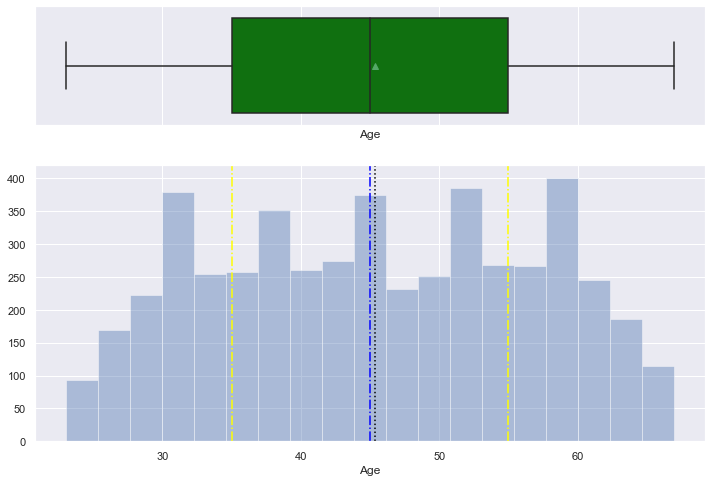

In [191]:
#  cols=['Age', 'Experience', 'Income', 'CCAvg' ,'Mortgage']
histogram_boxplot(dat1['Age'])

Income : the mean: 73.82454381391618, the median: 64.0
Skewness: 0.839703974295327
Q1: 39.0, Q3: 98.0


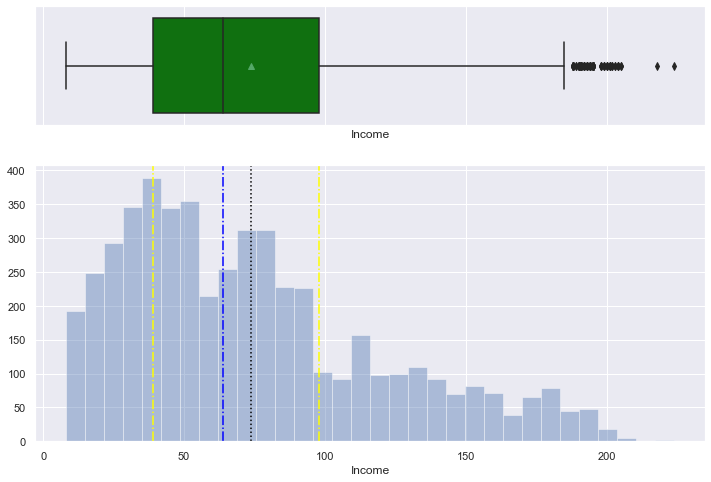

In [192]:
histogram_boxplot(dat1['Income'])

CCAvg : the mean: 1.9406296370563516, the median: 1.5
Skewness: 1.5958581402739354
Q1: 0.7, Q3: 2.6


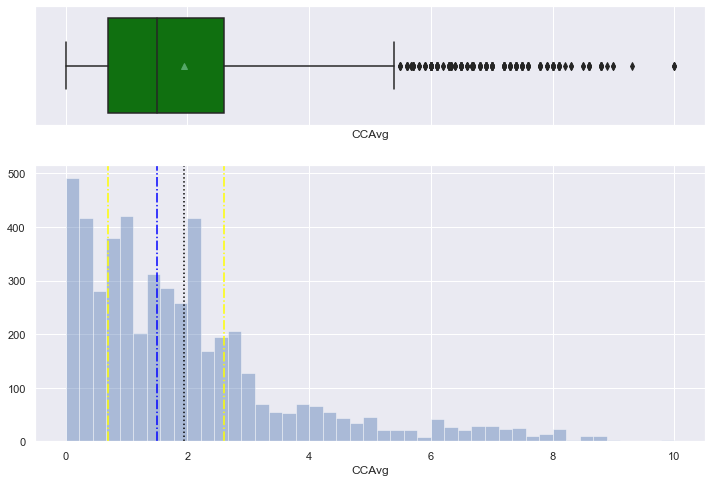

In [193]:
histogram_boxplot(dat1['CCAvg'])

Mortgage : the mean: 56.6460798074995, the median: 0.0
Skewness: 2.099909185604974
Q1: 0.0, Q3: 101.0


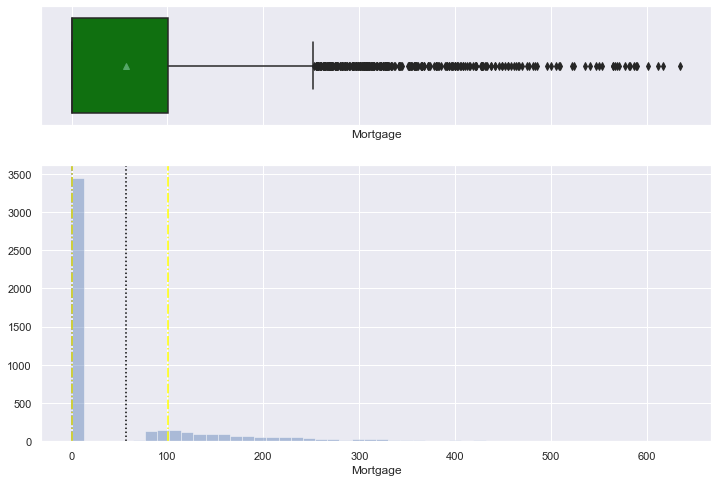

In [194]:
histogram_boxplot(dat1['Mortgage'])

In [195]:
def barplot(feature):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,5))
    total = float(len(feature))
    ax = sns.countplot(feature)
    plt.title(feature.name, fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

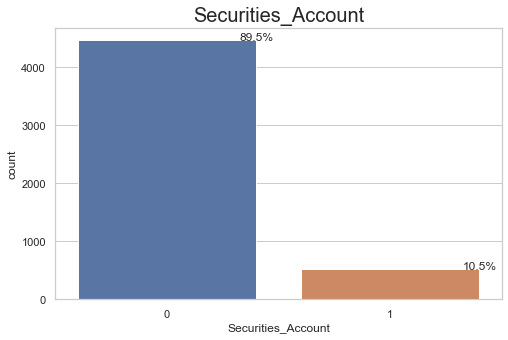

In [1834]:
barplot(dat1['Securities_Account'])

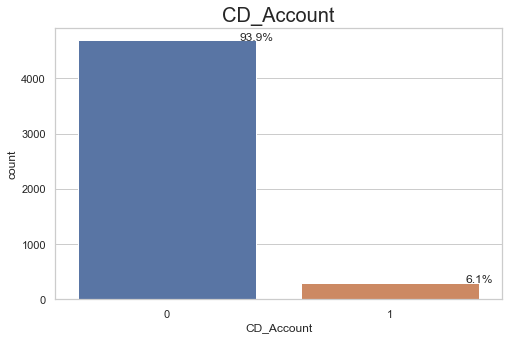

In [1835]:
barplot(dat1['CD_Account'])

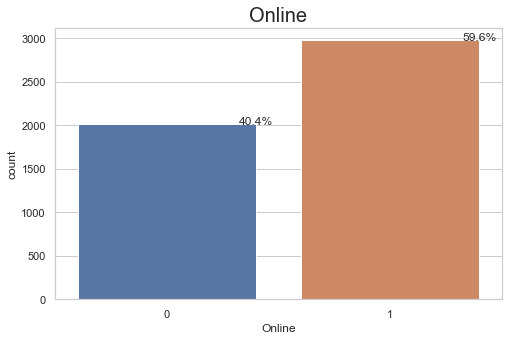

In [1836]:
barplot(dat1['Online'])

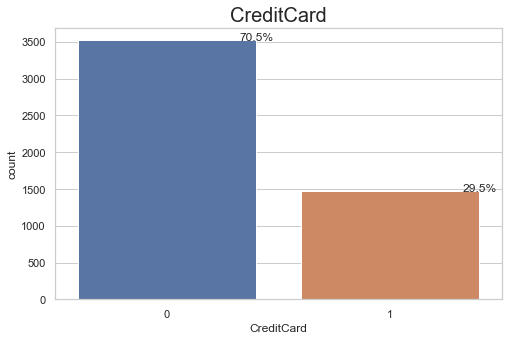

In [1837]:
barplot(dat1['CreditCard'])

<li>there is a strong relation between Age and Experience</li>

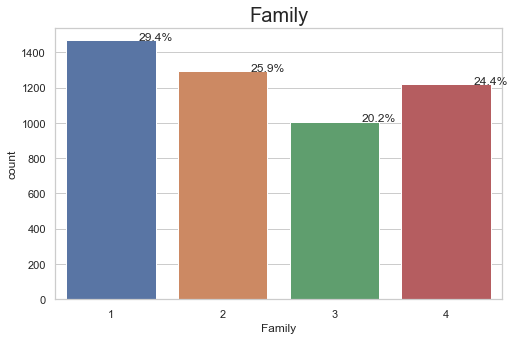

In [1838]:
barplot(dat1['Family'])

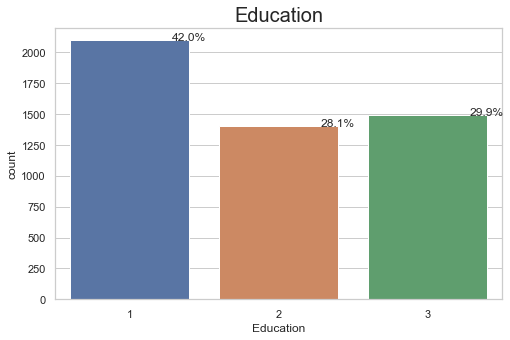

In [1839]:
barplot(dat1['Education'])

Average Income 73.82454381391618, median Income: 64.0 Q1 and Q3: 39.0 and 98.0


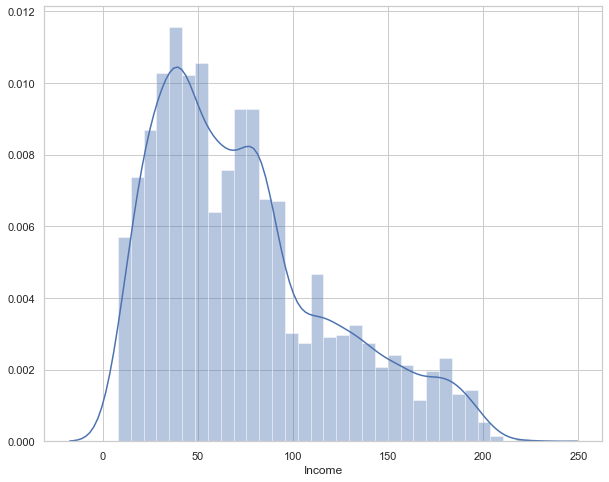

In [1840]:
plt.figure(figsize=(10,8))
sns.distplot(dat1['Income'])
print("Average Income {}, median Income: {} Q1 and Q3: {} and {}" .format(dat1['Income'].mean(),dat1['Income'].median(), dat1['Income'].quantile(.25),dat1['Income'].quantile(.75)))

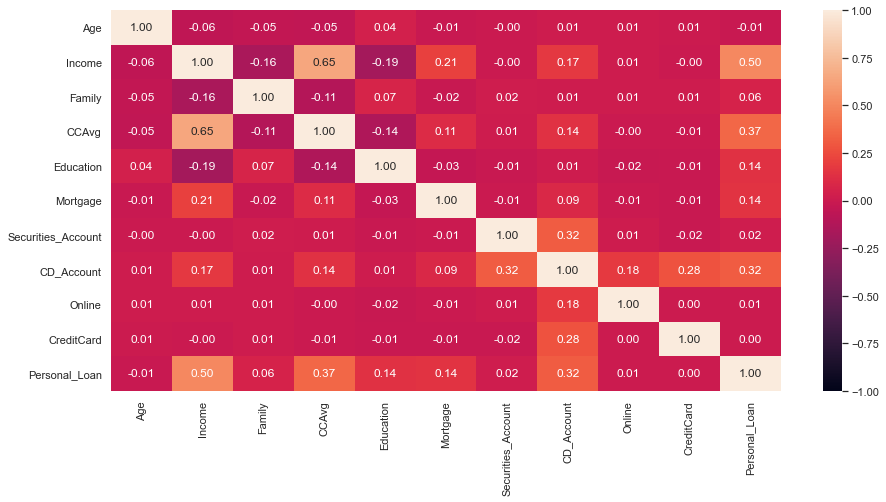

In [1841]:
plt.figure(figsize=(15,7))
sns.heatmap(dat1.corr(),annot=True,vmin=-1,vmax=1, fmt='.2f' )
plt.show()

<li>there is no significant correlation between the data exept Age-Experience</li>

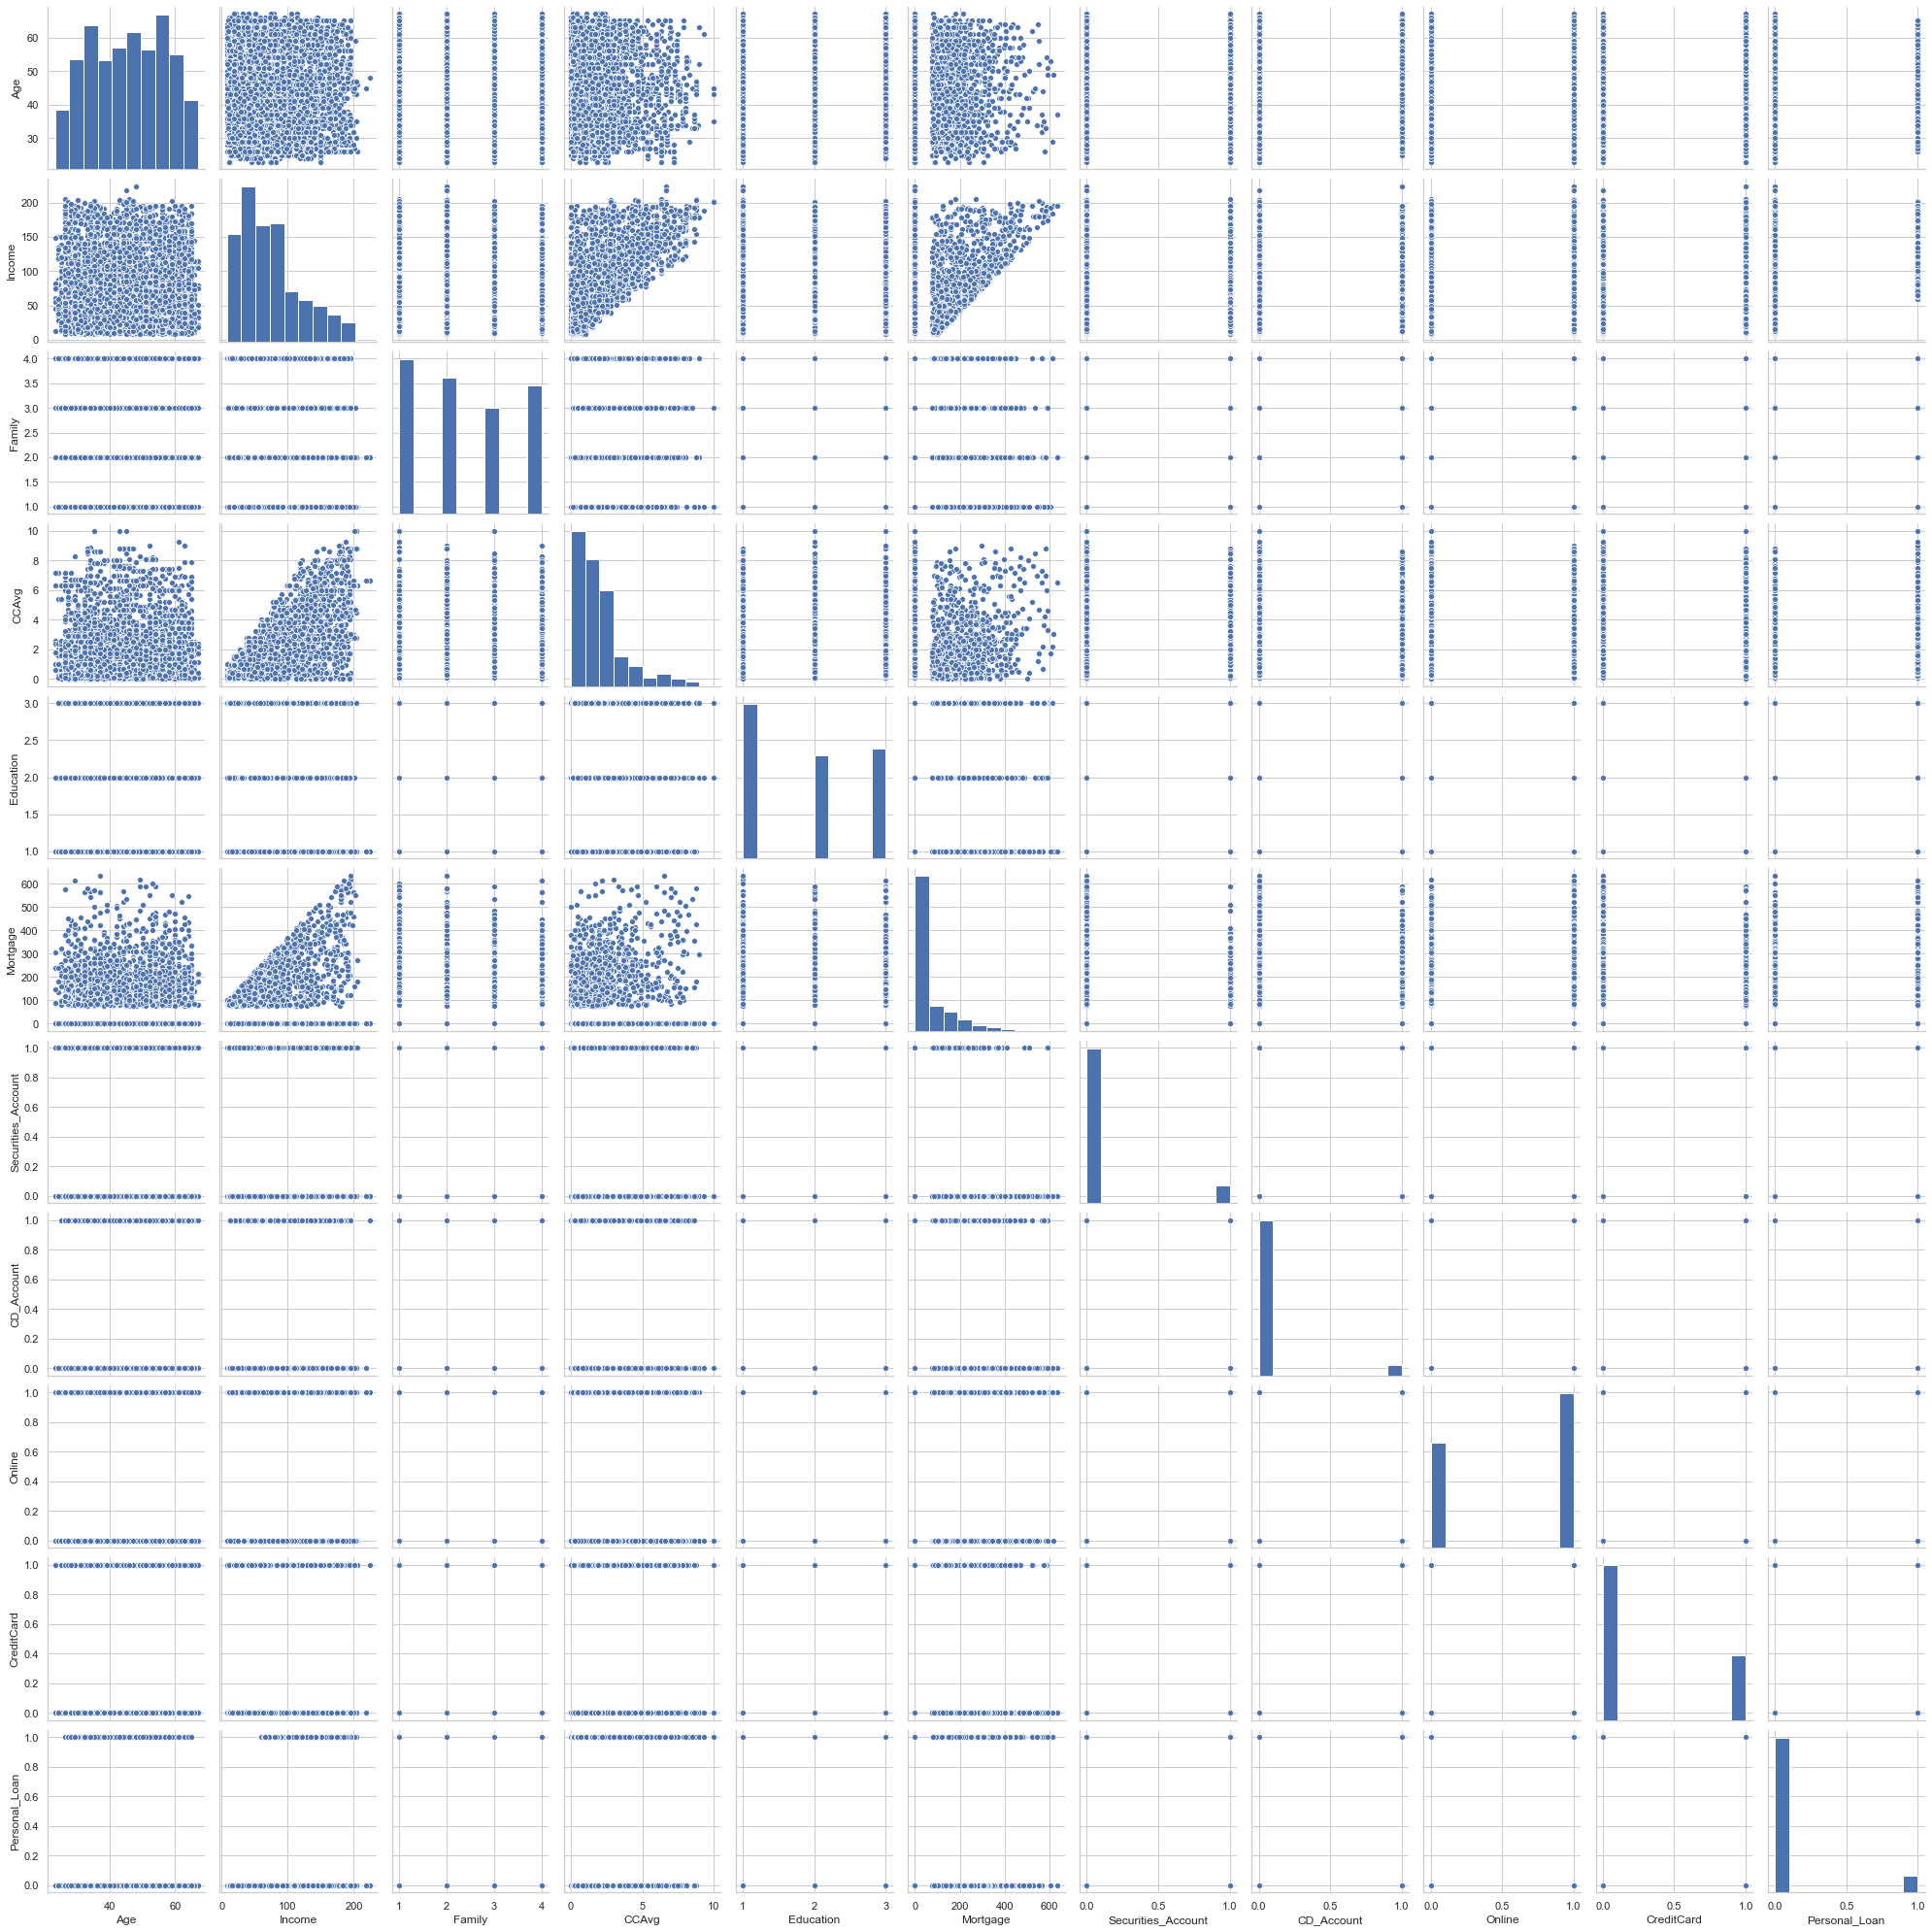

In [1842]:
sns.pairplot(dat1)

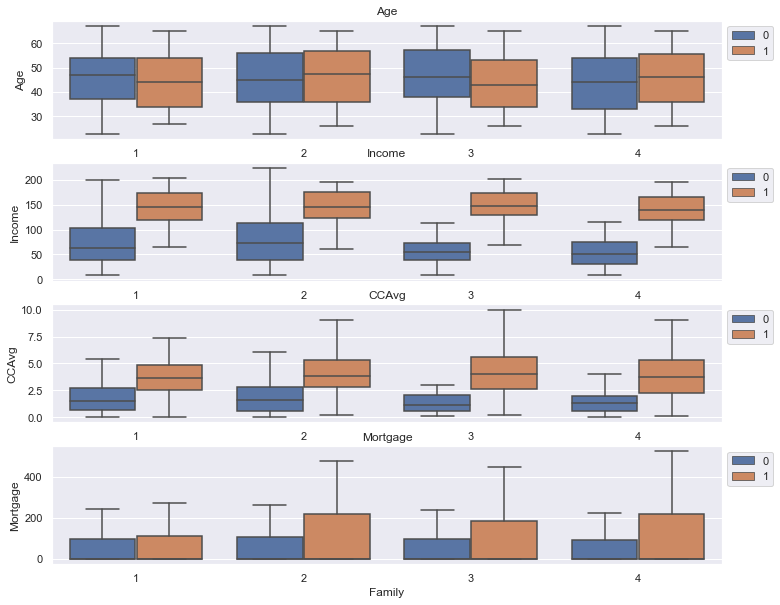

In [196]:
cols = dat1[['Age', 'Income', 'CCAvg', 'Mortgage']].columns.tolist()
plt.figure(figsize=(12,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,1,i+1)
                     sns.boxplot(dat1['Family'],dat1[variable],hue=dat1['Personal_Loan'], showfliers=False) 
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

<li>Higher income has a positive impact at getting loan independently from family status</li>
<li>Higher spending from credit card more chance for loan</li>
<li>Age has a light influence on getting monex from the bank</li>
<li>Mortgage are higher at people who receive a loan</li>

## Split data

In [199]:
X=dat1.drop('Personal_Loan', axis=1)
y=dat1['Personal_Loan']

In [202]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

(3490, 10) (1497, 10) (1497,) (3490,)


## Build the decision tree model

In [203]:
y.value_counts(normalize=True)

0    0.90375
1    0.09625
Name: Personal_Loan, dtype: float64

## Share the model weight according the proportion of dependent variable

In [204]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.90,1:0.10},random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, random_state=1)

## Score of our decision tree

In [205]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9873079492317969


* the Bank would like to minimalize the loss that means:
    - would like to return a money after lent
    - dont want to lend money if the risk is hight not to get it back
* Loss is greater if the bank dont receive the money back

In [206]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

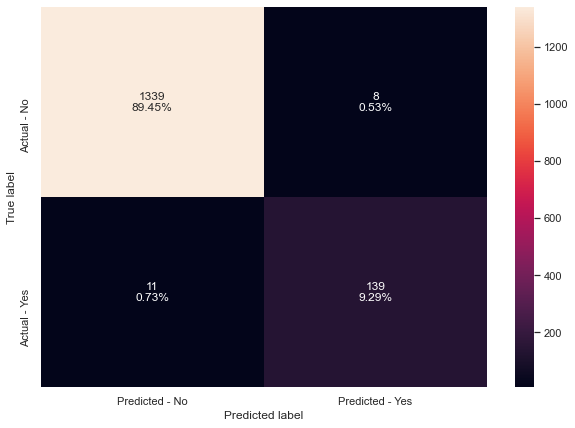

In [207]:
make_confusion_matrix(model,y_test)

In [208]:
y_train.value_counts(1)

0    0.905444
1    0.094556
Name: Personal_Loan, dtype: float64

In [209]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [211]:
# Accuracy on train and test
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))
# Recall on train and test
get_recall_score(model)

Accuracy on training set :  1.0
Accuracy on test set :  0.9873079492317969
Recall on training set :  1.0
Recall on test set :  0.9266666666666666


In [212]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


## Create the decision tree

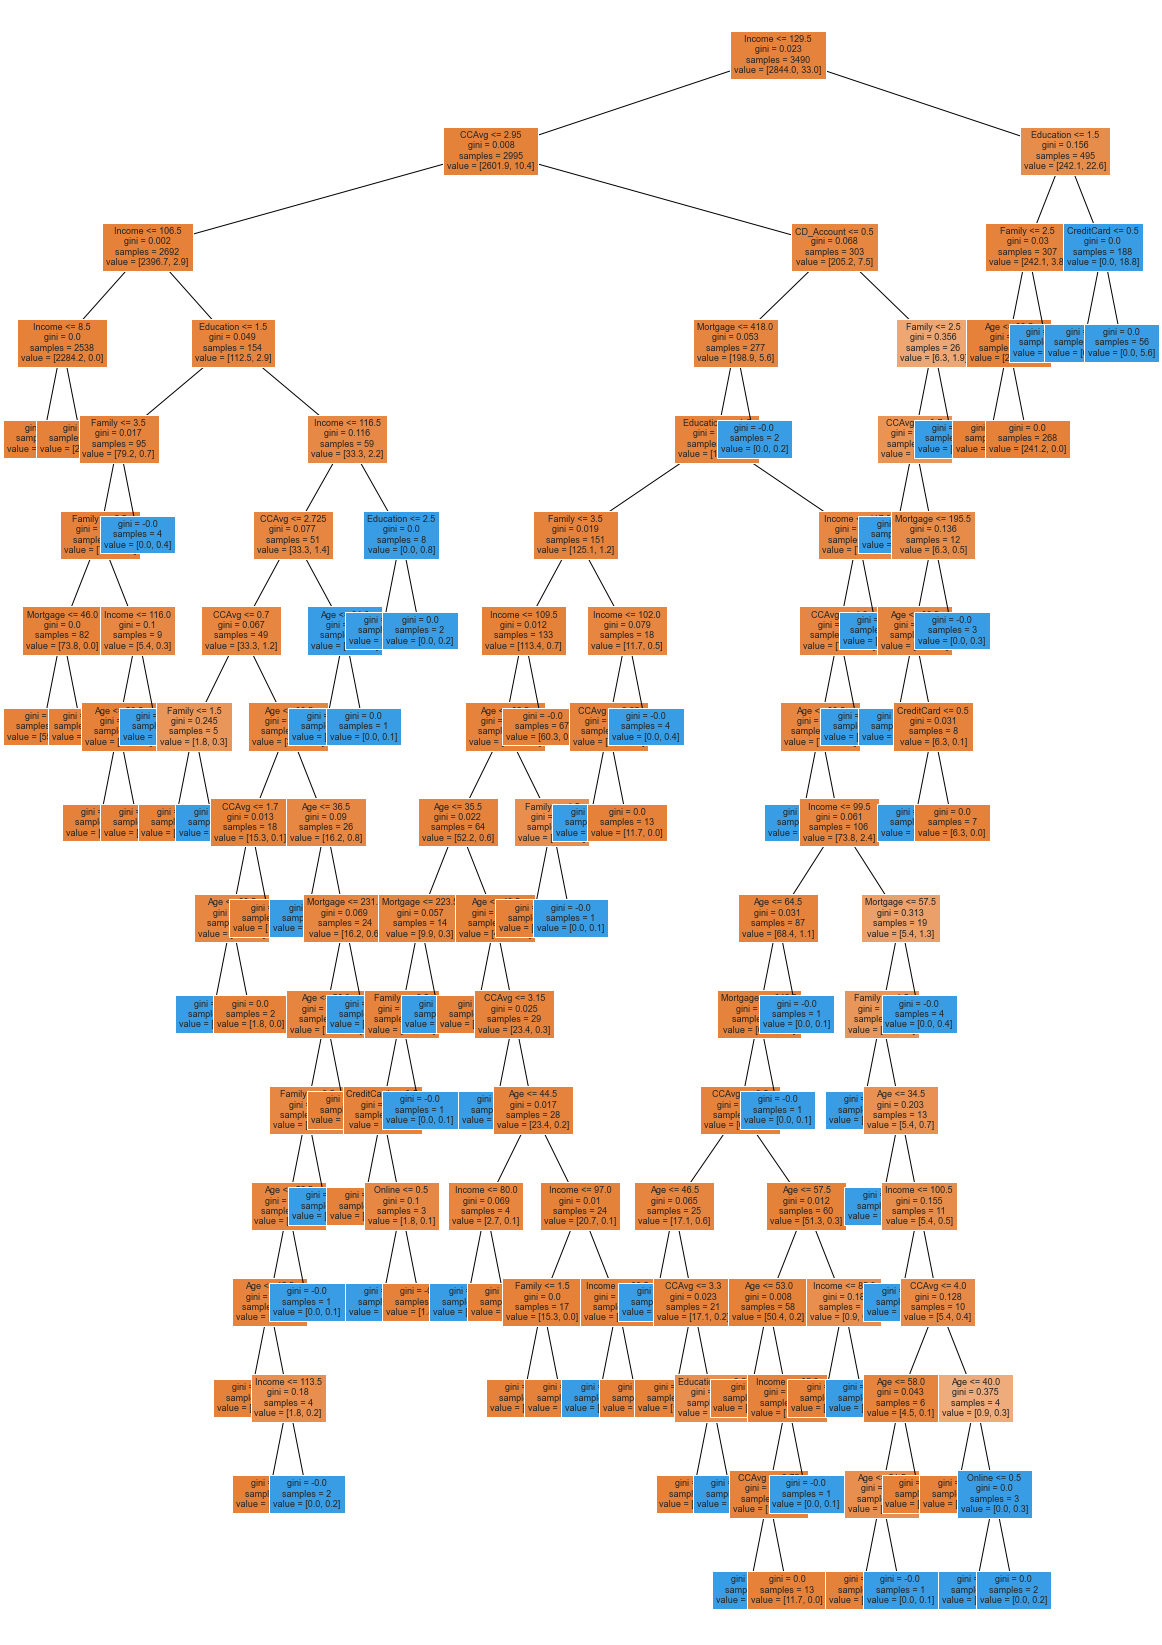

In [213]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [214]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 129.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- Income <= 8.50
|   |   |   |   |--- weights: [15.30, 0.00] class: 0
|   |   |   |--- Income >  8.50
|   |   |   |   |--- weights: [2268.90, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |--- Mortgage <= 46.00
|   |   |   |   |   |   |   |--- weights: [55.80, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  46.00
|   |   |   |   |   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |--- Income <= 116.00
|   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |   |--- weights: [4.50, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  116.00
|   |   |   |   |   |   |   

## Which variables are most significant in model?

In [215]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.529515
Family              0.172153
Income              0.147170
Age                 0.054581
CCAvg               0.049139
Mortgage            0.031300
CD_Account          0.010090
CreditCard          0.003148
Online              0.002904
Securities_Account  0.000000


* there is only one variable that was declared not as important variable "Securities_Account"
* Education 52,9%
* Family 17.2%
* Income 14.7% <br>
<strong>The first three important variables 84.8% from the sum importance of variables</strong>

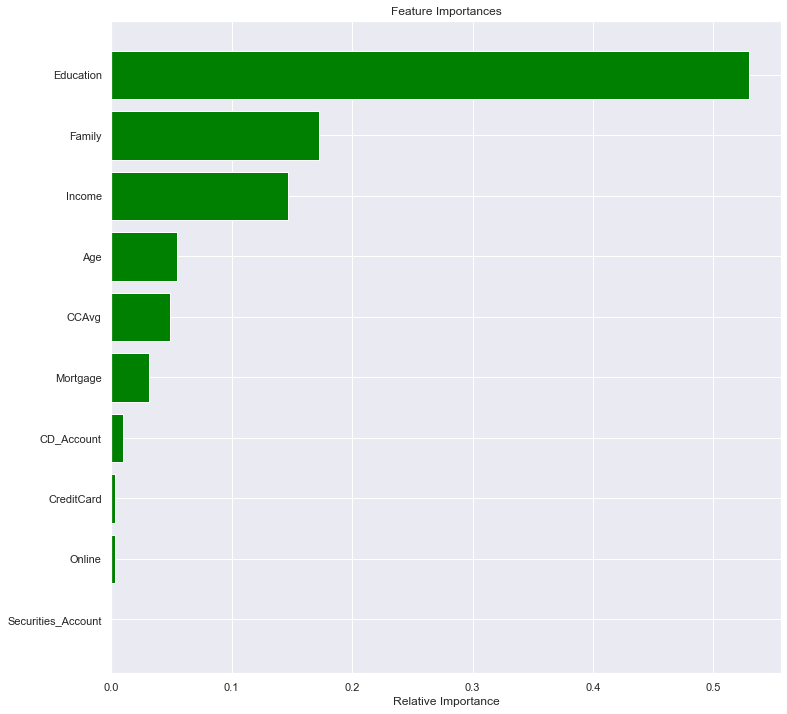

In [216]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* the three most significant variable cover apprx. 84,8% of the prediction "effort"
    - Education - 52,9%
    - Family - 17,2%
    - Income - 14,7%
* There is only one variable not declared as important feature "Securituies Account"

## Decision tree improvements
* prepruning set max depth
* GridSearch (improvement with hyper parameters)

## Create the decision tree model with a depth of 3 level
<br><li>We have to focus on reducing overfitting and complexity so I try to create the tree with 3 depth

In [217]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

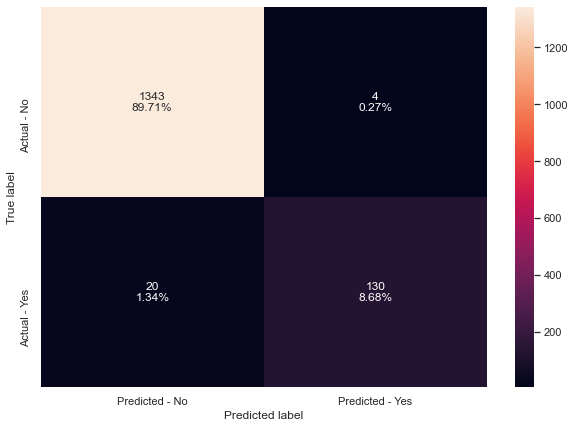

In [220]:
make_confusion_matrix(model1,y_test)

In [221]:
# Accuracy on train and test
print("Accuracy on training set : ",model1.score(X_train, y_train))
print("Accuracy on test set : ",model1.score(X_test, y_test))
# Recall on train and test
get_recall_score(model1)

Accuracy on training set :  0.9819484240687679
Accuracy on test set :  0.9839679358717435
Recall on training set :  0.8272727272727273
Recall on test set :  0.8666666666666667


* Recall on the training set has reduced from 1 to 0.83 but it is not bad bacause the model is not overfitted now

## Visualizing the decision tree with maximal depth 3

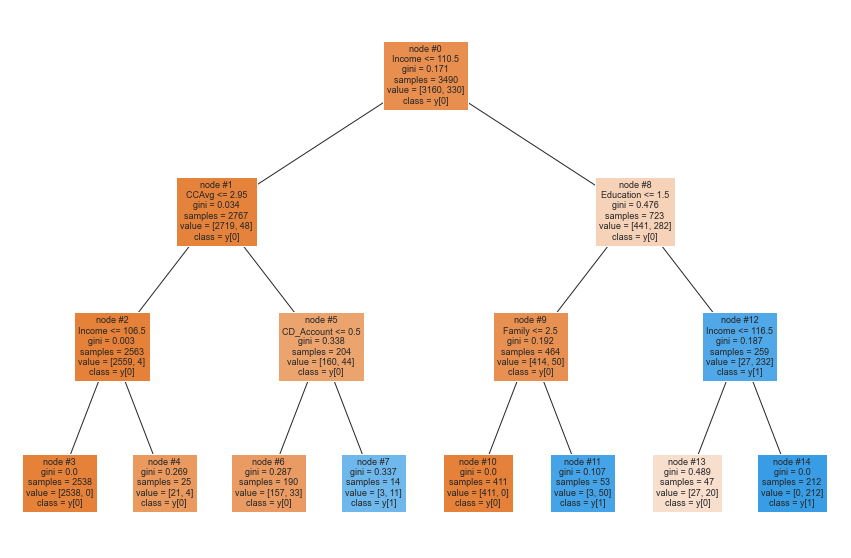

In [222]:
plt.figure(figsize=(15,10))

tree.plot_tree(model1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [223]:
print(tree.export_text(model1,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2538.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [21.00, 4.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [157.00, 33.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 11.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [411.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [3.00, 50.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [27.00, 20.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 212.00] class: 1



<li>the tree looks like better because more simplier Recall on the test set have to improve yet</li>

## Which variables are most significant in model1? (max depth=3)

In [224]:
print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.410395
Income              0.369598
Family              0.166136
CCAvg               0.034450
CD_Account          0.019421
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


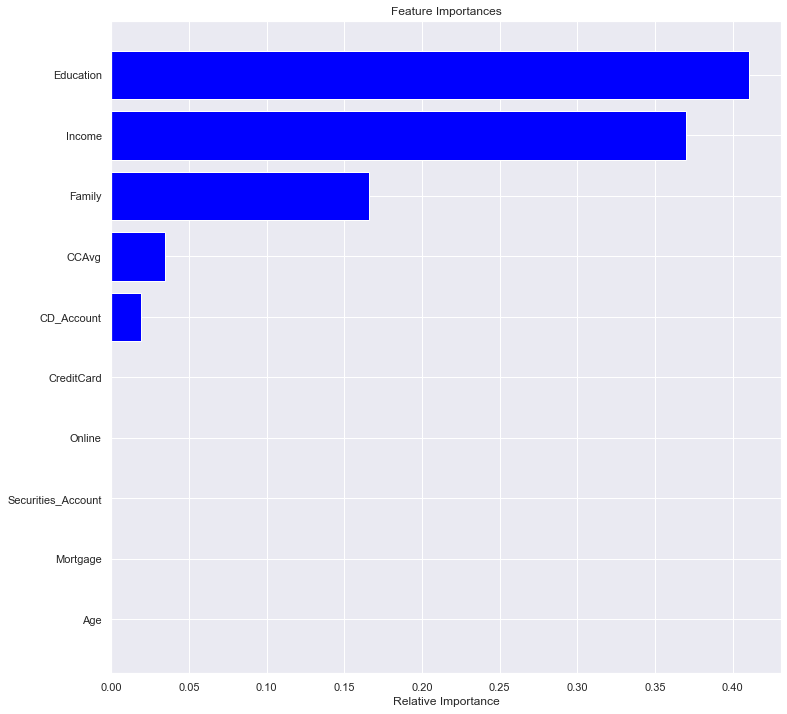

In [225]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* the three most significant variable cover apprx. 94,5%, in comparison with the previous model are the elements on the first three places the same but with this prepruning method we lost 4 features where the value is 0
    - Education - 41,0%
    - Income - 36,9%
    - Family - 16,6%
* the model after the prepruning is underfit

# Using GridSearch to improve the model

<li>Try to compute the optimal tree with hyper parameters
<li> Reduing the loss of the model is very important


In [226]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

## Confusion matrix - after tuning with hyperparameters

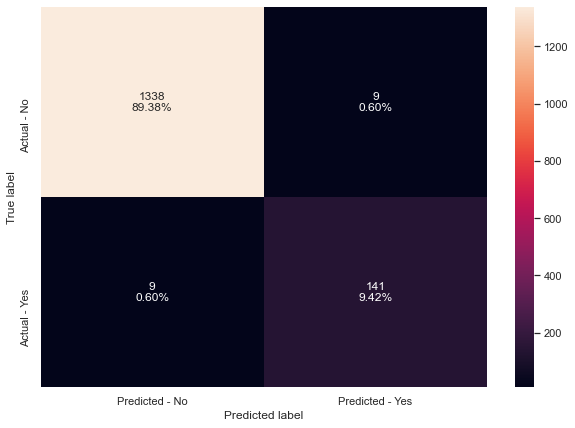

In [227]:
make_confusion_matrix(estimator,y_test)

In [230]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9865329512893983
Accuracy on test set :  0.9879759519038076
Recall on training set :  0.9030303030303031
Recall on test set :  0.94


<strong>Recall has improved in the training set from 0.83 to 0.90 and for the test set also from 0.87 to 0.94</strong>

## Visualizing the decision tree with GridSearch

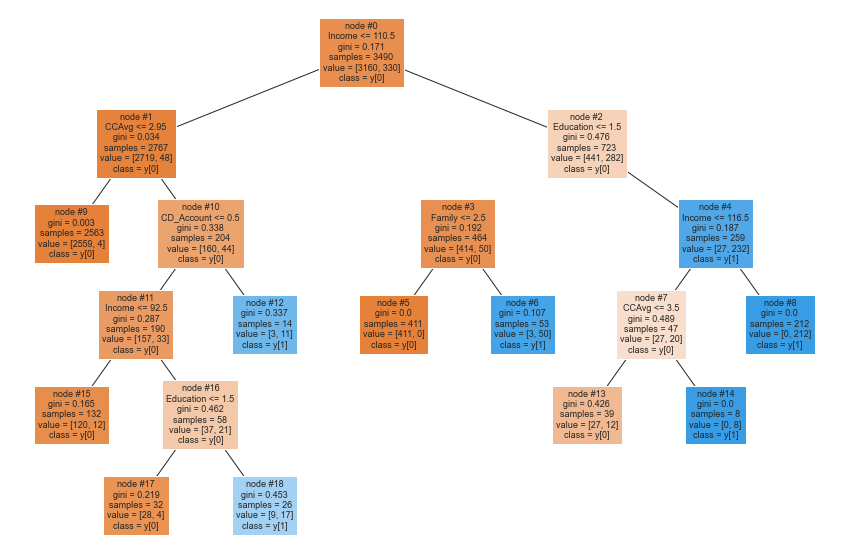

In [231]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [232]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2559.00, 4.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [120.00, 12.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [28.00, 4.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [9.00, 17.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 11.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [411.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [3.00, 50.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 3.50
|   |   |   |   |--- weights: [27.00, 12.00] class: 0
|   |   |   |--- CCAvg >  3.50
|   |   |   |   |--- weights: [0.00, 8.00] class: 1
|   |   |--- Income >  116.50


In [233]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.410793
Income              0.365037
Family              0.160075
CCAvg               0.045382
CD_Account          0.018713
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


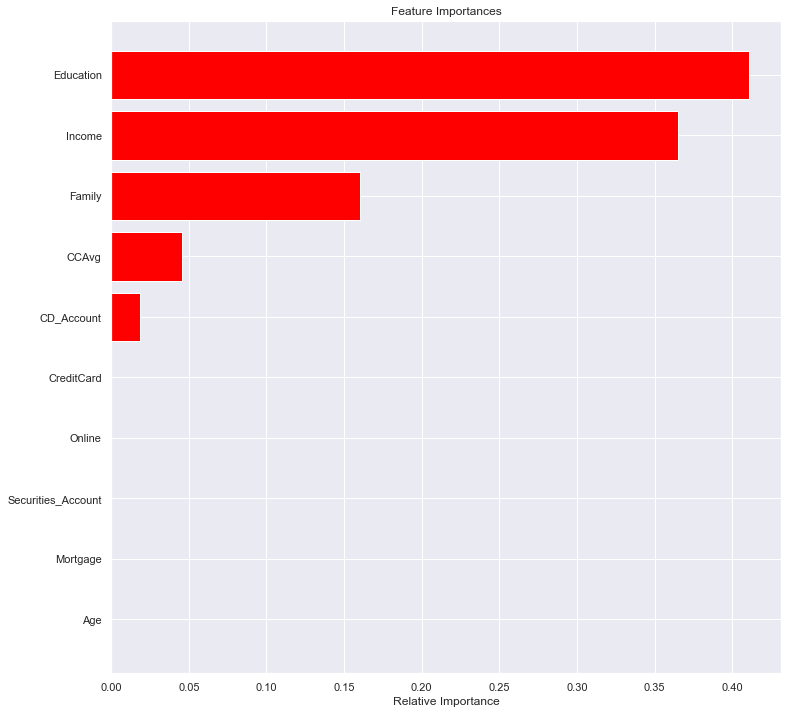

In [234]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* the three most significant variable cover apprx. 93,5%, in comparison with the previous model are the variables the same 
    - Education - 41,0%
    - Income - 36,5%
    - Family - 16,0%
* the model after the prepruning is underfitted

In [235]:
ccp_model= DecisionTreeClassifier(random_state=1)
ccp_path=ccp_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities

In [236]:
pd.DataFrame(ccp_path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000260    0.000521
2     0.000265    0.001582
3     0.000275    0.002131
4     0.000284    0.002700
5     0.000287    0.002987
6     0.000304    0.004205
7     0.000382    0.004587
8     0.000382    0.004969
9     0.000392    0.005753
10    0.000430    0.006183
11    0.000430    0.007043
12    0.000460    0.007964
13    0.000472    0.008908
14    0.000478    0.009386
15    0.000491    0.009877
16    0.000505    0.011898
17    0.000637    0.013808
18    0.000762    0.014571
19    0.000777    0.016900
20    0.000792    0.021652
21    0.001823    0.023475
22    0.001998    0.027472
23    0.002799    0.030271
24    0.004965    0.035236
25    0.007276    0.042512
26    0.023944    0.066455
27    0.052387    0.171230

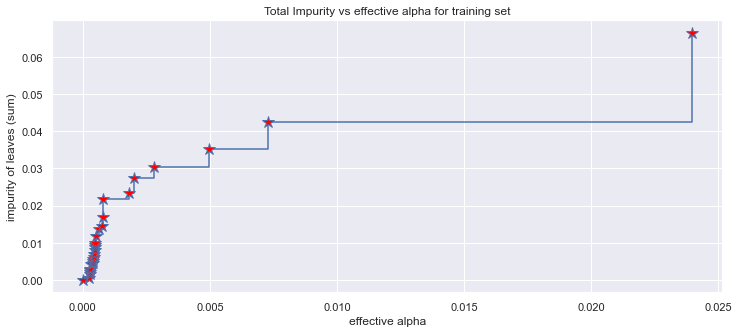

In [237]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='*',markersize=12,markerfacecolor='red', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("impurity of leaves (sum)")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

<li>the tree was trained with the effective alphas, the last alpha left the tree with one node</li>

In [238]:
clfs = []
for ccp_alpha in ccp_alphas:
    ccp_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    ccp_model.fit(X_train, y_train)
    clfs.append(ccp_model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05238734533418278


## If the Alpha increases the depth the tree decreases here are the plots below

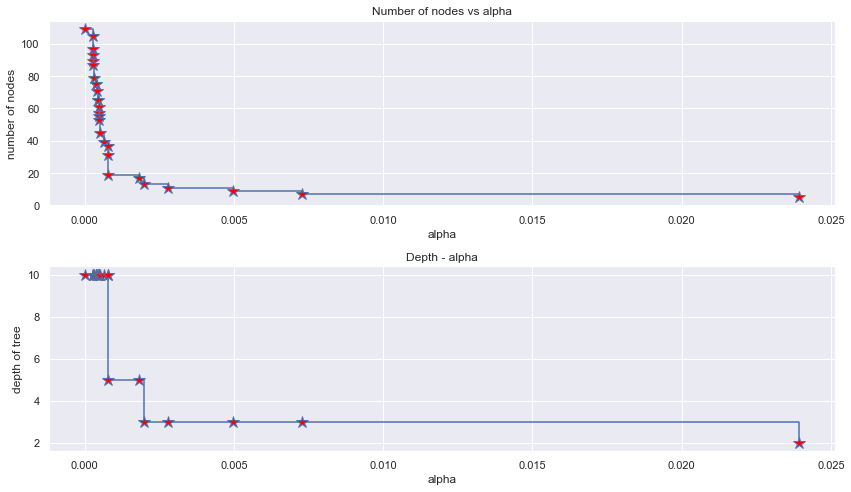

In [239]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(12,7))
ax[0].plot(ccp_alphas, node_counts, marker='*',markersize=12,markerfacecolor='red', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='*',markersize=12,markerfacecolor='red', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth - alpha")
fig.tight_layout()

# Alpha and Accuracy on test and training set

In [240]:
train_scores = [ccp_model.score(X_train, y_train) for ccp_model in clfs]
test_scores = [ccp_model.score(X_test, y_test) for ccp_model in clfs]

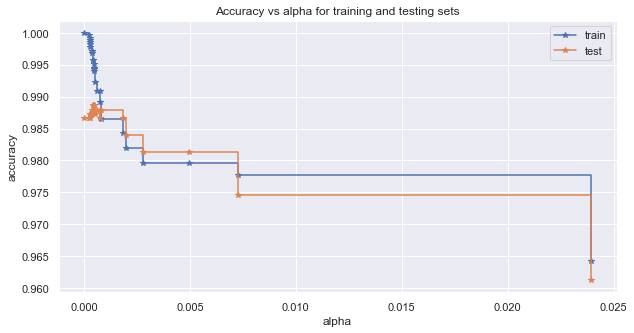

In [241]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='*', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='*', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [242]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0004297994269340974, random_state=1)
Training accuracy of best model:  0.995702005730659
Test accuracy of best model:  0.9886439545758183


In [243]:
recall_train=[]
for ccp_model in clfs:
    pred_train3=ccp_model.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [244]:
recall_test=[]
for ccp_model in clfs:
    pred_test3=ccp_model.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

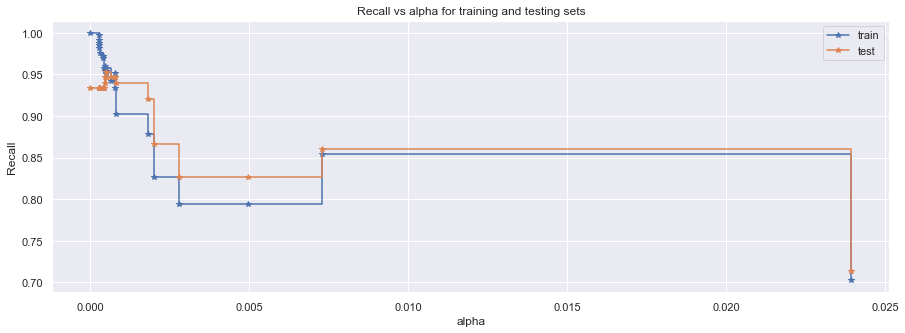

In [245]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='*', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='*', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [246]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0005053685569444881, random_state=1)


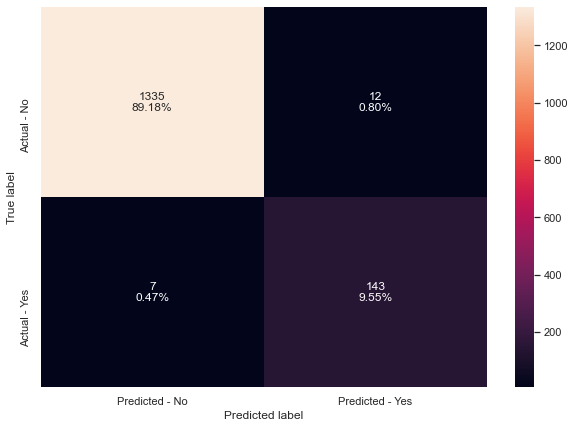

In [247]:
make_confusion_matrix(best_model,y_test)

In [249]:
# Accuracy on train and test
print("Accuracy on training set : ",best_model.score(X_train, y_train))
print("Accuracy on test set : ",best_model.score(X_test, y_test))
# Recall on train and test
get_recall_score(best_model)

Accuracy on training set :  0.9922636103151863
Accuracy on test set :  0.9873079492317969
Recall on training set :  0.9575757575757575
Recall on test set :  0.9533333333333334


<strong>Post-pruning method help us to get the highest recall on the training and test set</strong>

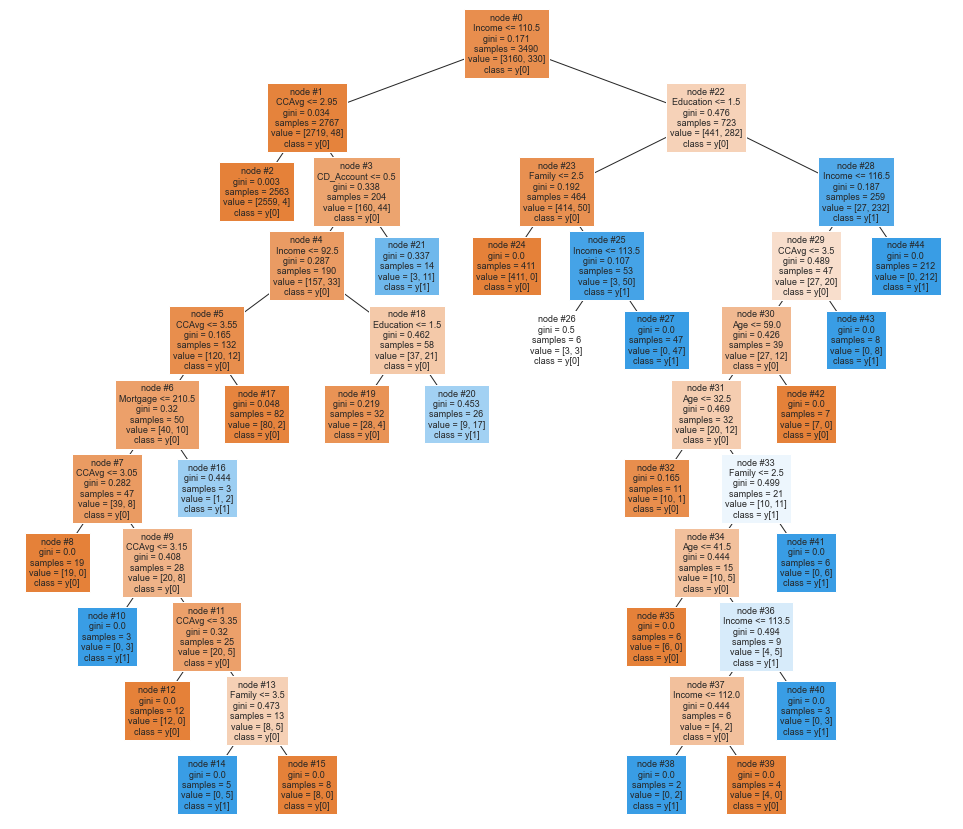

In [250]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [251]:
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2559.00, 4.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Mortgage <= 210.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [19.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.15
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00

In [252]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.385646
Income              0.355468
Family              0.168194
CCAvg               0.058859
CD_Account          0.017567
Age                 0.011767
Mortgage            0.002500
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


* These are the importance list in the best decision tree model:
- Education 38,6%
- Income 35,5%
- Family 16,8%<br>
<strong> the first 3 most important variables have more than 90% proportion from the sum imporance</strong>

## visualize the importance of variables in the best model

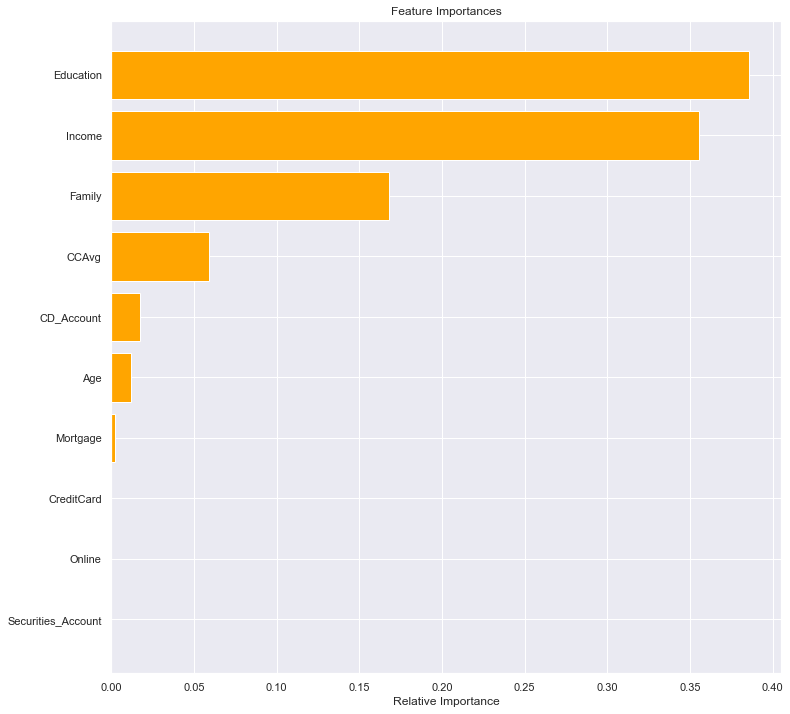

In [253]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Summarizing Logostic regression and Decision tree models
<hr>

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Model</th>      <th>Accuracy on test set</th>      <th>Accuracy on training set</th>      <th>Recall on test set</th>      <th>Recall on training set</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Log.reg.8 feature mod.</td>      <td>0,95</td>      <td>0,96</td>      <td>0,631</td>      <td>0,686</td>    </tr>    <tr>      <th>1</th>      <td>Log.reg.opt. Threshold</td>      <td>0,906</td>      <td>0,925</td>      <td>0,51</td>      <td>0,601</td>    </tr>    <tr>      <th>2</th>      <td>Log.reg.orig. log.reg.</td>      <td>0,922</td>      <td>0,934</td>      <td>0,369</td>      <td>0,441</td>    </tr>    <tr>      <th>3</th>      <td>decision_tree.orig. dec.tree</td>      <td>0,987</td>      <td>1</td>      <td>0,927</td>      <td>1</td>    </tr>    <tr>      <th>4</th>      <td>decision_tree.a depth of 3</td>      <td>0,984</td>      <td>0,982</td>      <td>0,867</td>      <td>0,827</td>    </tr>    <tr>      <th>5</th>      <td>decision_tree.GridSearch</td>      <td>0,988</td>      <td>0,987</td>      <td>0,94</td>      <td>0,903</td>    </tr>    <tr>      <th>6</th>      <td>decision_tree.opt. Model</td>      <td>0,987</td>      <td>0,992</td>      <td>0,953</td>      <td>0,958</td>    </tr>  </tbody></table>

## Conclude with the key takeaways for the marketing team
* the interest of the bank to choose the model with the best Recall it is a decision tree optimalisation with GridSearch with this method the best to research the potential customers and make sure pay back the loan

## Takeaway for business:


* Education, Income and Family are the most important variables to decide to lend a Loan
* deeply analysis of customer spending and create tailormade loan products
* reducing interest rates could be lead to a better "pay back" behavior
* introduce more digital services
* research customers needs and try to satisfy them
